In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os
import sys
import math
import scipy.stats
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
import scipy.stats as stats

import matplotlib
colorslist = ['#002299','white','#CC3300']
cmaps = matplotlib.colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=800)

import matplotlib
#colorslist = ['#6e9ecf','white','#de593a']
###fffcf0
#colorslist = ['#6a60a9','#dedcee','#fbd14b']
#colorslist = ['#6a60a9','white','#fbd14b']
colorslist = ['#6e9ecf','white','#de593a']
cc = matplotlib.colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=800)





# Fig. 1b

#See "ODYD_Seurat3.0.R"

In [ ]:
#Data Source: ODYD_Metadata.txt
#CellTypeColorsDict={'NK1':'#1faae1','NK2':'#f15a2e','NKT':'#FCBCB8'
#                      ,'CD8Teff':'#96a4b8','CD8Tn':'#d8a490','CD4Tn':'#775020','CD4Tmem':'#cba72d'
#                     ,'B1':'#bdded7','B2':'#78c8ce'}



# Fig. 1c

In [538]:
#Data Source: ODYD_Metadata.txt
#Data Source: ODYD_CelPorporation_log2OvsY_Fig1c.xlsx
F='../SourceData/ODYD_Metadata.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

Elder=DF[DF['Age']=='O']
Young=DF[DF['Age']=='Y']
Young

,nCount_RNA,nFeature_RNA,percent.mt,UMAP_1,UMAP_2,RenameGroup,Age,CellTypeGroup,CellType,person,tSNE_1,tSNE_2
AAATGGACACCCAAGC-2,4573,1572,5.357533,2.353331,5.962826,1_YD,Y,NK2_Y,NK2,py0,-1.672564,-32.682588
AGATCGTCAACTCGAT-2,5518,1746,8.988764,4.152036,4.262067,3_YD,Y,CD8Teff_Y,CD8Teff,py1,-16.941667,-14.428596
CAGCAATTCACTCGAA-2,6433,2079,4.912172,4.114042,4.038454,3_YD,Y,CD8Teff_Y,CD8Teff,py2,-12.358522,-17.819265
CATCAAGTCCCATAGA-2,6263,1947,9.516206,4.075525,4.360232,3_YD,Y,CD8Teff_Y,CD8Teff,py2,-12.463390,-18.042894
GCTACCTGTATATGGA-2,5370,1905,5.512104,1.966242,6.159224,1_YD,Y,NK2_Y,NK2,py0,-0.974660,-31.083994
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGCACGAT-2,9515,1895,9.427220,-1.926489,-6.301385,4_YD,Y,CD8Tn_Y,CD8Tn,py2,7.330984,44.586365
TTTGTTGAGTTGGACG-2,7690,1569,4.863459,-5.699164,-3.814719,5_YD,Y,CD4Tn_Y,CD4Tn,py0,22.724778,17.356829
TTTGTTGGTCAAATCC-2,6112,1704,7.068063,2.627618,1.634951,3_YD,Y,CD8Teff_Y,CD8Teff,py0,0.011128,-3.551761
TTTGTTGGTTACGATC-2,6362,2287,6.350204,2.631676,6.888127,1_YD,Y,NK2_Y,NK2,py0,-6.697267,-32.968368


In [7]:
#Data Source: ODYD_Metadata.txt
#Data Source: ODYD_CelPorporation_log2OvsY_Fig1c.xlsx
F='../SourceData/ODYD_Metadata.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

Elder=DF[DF['Age']=='O']
Young=DF[DF['Age']=='Y']

def CelNum(DF,Type):
    DF=DF[DF['CellType']==Type]
    print (Type, len(DF))
    
C=sorted(list(set(list(DF['CellType']))))

print ('Cluster cell number (Elder):')
for i in C:
    CelNum(Elder,i)
    
print ('Cluster cell number (Young):')
for i in C:
    CelNum(Young,i)


Cluster cell number (Elder):
B1 641
B2 248
CD4Tmem 1219
CD4Tn 880
CD8Teff 847
CD8Tn 178
NK1 721
NK2 1540
NKT 75
Cluster cell number (Young):
B1 273
B2 219
CD4Tmem 1030
CD4Tn 757
CD8Teff 889
CD8Tn 469
NK1 552
NK2 629
NKT 112


No handles with labels found to put in legend.


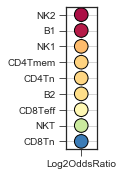

In [21]:
F='../SourceData/ODYD_CelPorporation_log2OvsY_Fig1c.xlsx'
DF=pd.read_excel(F,index_col=0)
DF

DFs=DF['Log2OddsRatio'].to_frame()
#散点图
Sample=list(DFs)
y=[1+i for i in range(len(DFs))]
x=[1+i for i in range(len(list(DFs)))]
Ylim=[0.5,y[-1]+0.5]
Xlim=[0.5,1.5]
X=[]
Y=[]
C=[]
Header=list(DFs)
for i in range(len(list(DFs))):
    Col=Header[i]
    C=C+list(DFs[Col])
    X=X+[1+i]*len(DFs)
    Y=Y+y
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(0.85,2.2))
ax=fig.add_axes([0.3,0.08,0.5,0.9])
ax.set_xlim(Xlim)
ax.set_ylim(Ylim)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(list(DFs),rotation=0)
ax.set_yticklabels(list(DFs.index))
ax.scatter(X,Y,c=C,cmap='Spectral_r',s=185,alpha=1,vmin=-2,vmax=1,edgecolors='black')
ax.grid(which='minor', axis='y', linewidth=0.75, linestyle='-', color='white')
ax.tick_params(axis='y',length=7,labelsize=10,direction='out')
ax.tick_params(axis='x',length=7,labelsize=10,direction='out')
ax.legend()
ax.grid(True)
outfig='../Figures/ODYD_CelPorporation_log2OvsY_Fig1c.pdf'
plt.savefig(outfig)

plt.show()  

# Fig. 1d

In [ ]:
#Source Data: GSE103232_hs_blood_batch2_counts_DEseq.csv
#Source Data: ODYD_CellType_MarkerGenes_Top10_Fig1d.txt
    

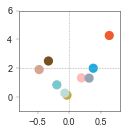

In [200]:
bulkF='../SourceData/GSE103232_hs_blood_batch2_counts_DEseq.csv'
bulk=pd.read_csv(bulkF,index_col=0)
#bulk = bulk.groupby('gene').mean()   

#remove duplicates genenames

#1. dataframe(行名：细胞类型；列名：averageFD + mdeainFD + -log10p)

scMarkerF='../SourceData/ODYD_CellType_MarkerGenes_Top10_Fig1d.txt'
scMarker=pd.read_table(scMarkerF,sep='\t',index_col=0)

celltype=list(set(scMarker['cluster']))

with open('../SourceData/GSE103232_ODYD_CellPorchange_log2FDmean_AA_BB_CC_DD_Ttest_10gene_Fig1d.txt','a+')as f:
    f.write('\t%s\t%s\n'%('FD','log10pval'))
    
for c in celltype:
    celltypeMarker=list(set(scMarker[scMarker['cluster']==c]['gene']))
    celltypeMarker=[i for i in celltypeMarker if i in list(bulk.index)]
    bulk_in_celltype=bulk.loc[celltypeMarker]
    #Select ten samples with the oldest and youngest age
    Ysamples=['AA1','AA2','AA3','AA4','AA5','AA6','AA7','AA8','BB2','BB3']
    Osamples=['DD1','DD2','DD3','DD4','DD5','DD6','DD7','DD8','CC2','CC3']    
    bulk_in_celltype['Y']=bulk_in_celltype[Ysamples].apply(np.mean,axis=1)
    bulk_in_celltype['O']=bulk_in_celltype[Osamples].apply(np.mean,axis=1)
    bulk_in_celltype=bulk_in_celltype[['Y','O']]
    def Log2(L):return np.array([math.log(i+1.0,2) for i in L])
    bulk_in_celltype=bulk_in_celltype.apply(Log2)
    bulk_in_celltype['O-Y']=bulk_in_celltype['O']-bulk_in_celltype['Y']
    log2FD=bulk_in_celltype.apply(np.mean,axis=0).loc['O-Y']
    def log10(L):return -math.log(L,10)
    log10pval=log10(scipy.stats.ttest_rel(list(bulk_in_celltype['Y']),list(bulk_in_celltype['O']))[1])
    with open('../SourceData/GSE103232_ODYD_CellPorchange_log2FDmean_AA_BB_CC_DD_Ttest_10gene_Fig1d.txt','a+')as f:
        f.write('%s\t%s\t%s\n'%(c,log2FD,log10pval))


F='../SourceData/GSE103232_ODYD_CellPorchange_log2FDmean_AA_BB_CC_DD_Ttest_10gene_Fig1d.txt'
Dif=pd.read_table(F,sep='\t',index_col=0)

plt.style.use('seaborn-white')
fig=plt.figure(figsize=(2,2))
ax=fig.add_axes([0.2,0.2,0.7,0.7])
ax.tick_params(axis='y',length=3,labelsize=9,direction='out',width=0.25)
ax.tick_params(axis='x',length=3,labelsize=9,direction='out',width=0.25)
ax.scatter(Dif['FD']['NK1'],Dif['log10pval']['NK1'],c='#1faae1',alpha=1,s=85,edgecolor='none')    
ax.scatter(Dif['FD']['NK2'],Dif['log10pval']['NK2'],c='#f15a2e',alpha=1,s=85,edgecolor='none')   
ax.scatter(Dif['FD']['NKT'],Dif['log10pval']['NKT'],c='#FCBCB8',alpha=1,s=85,edgecolor='none')   
ax.scatter(Dif['FD']['CD8Teff'],Dif['log10pval']['CD8Teff'],c='#96a4b8',alpha=1,s=85,edgecolor='none')   
ax.scatter(Dif['FD']['CD8Tn'],Dif['log10pval']['CD8Tn'],c='#d8a490',alpha=1,s=85,edgecolor='none')   
ax.scatter(Dif['FD']['CD4Tn'],Dif['log10pval']['CD4Tn'],c='#775020',alpha=1,s=85,edgecolor='none')   
ax.scatter(Dif['FD']['CD4Tmen'],Dif['log10pval']['CD4Tmen'],c='#cba72d',alpha=1,s=85,edgecolor='none')   
ax.scatter(Dif['FD']['BC1'],Dif['log10pval']['BC1'],c='#bdded7',alpha=1,s=85,edgecolor='none')  
ax.scatter(Dif['FD']['BC2'],Dif['log10pval']['BC2'],c='#78c8ce',alpha=1,s=85,edgecolor='none')  
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.set_xlim([-0.8,0.8]) 
ax.set_ylim([-1,6])
#ax.axvline(x=0.32,ls='--',color='darkgray',alpha=1,linewidth=1)
#ax.axvline(x=-0.32,ls='--',color='darkgray',alpha=1,linewidth=1)
ax.axvline(x=0,ls='--',color='darkgray',alpha=1,linewidth=0.5)
ax.axhline(y=2,ls='--',color='darkgray',alpha=1,linewidth=0.5)
outfig='../Figures/GSE103232_ODYD_CellPorchange_log2FDmean_AA_BB_CC_DD_Ttest_10gene_Fig1d.pdf'
plt.savefig(outfig)
plt.show()


# Fig. 1e & Fig. 2a

In [99]:
#Supplementary Table 2_Fig1e_NK1vsNK2_DEGene_and_Fig2a_GOterm.xlsx
#Fig. 1e : heatmap genes = NK1 vs NK2 DEG (Supplementary Table 2_Fig1e_NK1vsNK2_DEGene_and_Fig2a_GOterm.xlsx : NK1_vs_NK2_DEG)



No handles with labels found to put in legend.


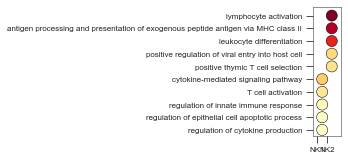

In [121]:
#读入处理好的28个module的打分值文件
#logP_F = '/Users/huangbeibei/Desktop/Aging/Figures/Figures_v1/Figure2SupFig2/MatureNK/Goterm.up_ForBubblePlot.logP.txt'
#logP=pd.read_csv(logP_F,sep='\t',index_col=0)
F='../SourceData/NK1vsNK2_GOBP_Top5_Forplot_Fig2a.txt'
DF=pd.read_table(F,sep='\t',index_col=0)
Sample=list(DF)
y=[0.5+i for i in range(len(DF))]
x=[0.5+i for i in range(len(list(DF)))]
Ylim=[0,y[-1]+0.7]
Xlim=[0.0,3.0]
X=[]
Y=[]
C=[]

Header=list(DF)
for i in range(len(list(DF))):
    Col=Header[i]
    C=C+list(DF[Col])

    X=X+[1+i]*len(DF)
    Y=Y+y
    

    
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(0.8,2))
ax=fig.add_axes([0.3,0.08,0.5,0.9])
ax.set_xlim(Xlim)
ax.set_ylim(Ylim)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(list(DF),rotation=0)
ax.set_yticklabels(list(DF.index))
ax.scatter(X,Y,c=C,cmap='YlOrRd',s=123,alpha=1,edgecolors='black',linewidths=0.5)
ax.grid(which='minor', axis='y', linewidth=0.0, linestyle='-', color='white')
ax.tick_params(axis='y',length=7,labelsize=8,direction='out')
ax.tick_params(axis='x',length=7,labelsize=8,direction='out')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.legend()
ax.grid(False)
outfig='../Figures/NK1vsNK2_GOBP_Top5_Forplot_Fig2a.pdf'
plt.savefig(outfig)

plt.show()  

# Fig. 1f

In [122]:
F='../SourceData/NK1NK2_ScanpyNormLn.txt'
Exp=pd.read_table(F,sep='\t',index_col=0)

MF='../SourceData/ODYD_Metadata.txt'
MetaDF=pd.read_table(MF,sep='\t',index_col=0)
MetaDF_NK=MetaDF[(MetaDF['CellType']=='NK1')|(MetaDF['CellType']=='NK2')]

print (Exp.shape[0])
print (Exp.shape[1])

17731
3442


In [140]:
outDir='../Figures/'
#'RdYlBu_r'
def SingleGeneExp_intSNE(MDF,ExpDF,Explabels,MarkerGenes,Min,Max,cmap=cc,outFilePrefix=outDir):
    ExpDF=ExpDF.loc[list(MDF.index)]
    ExpDF['tSNE_1']=MDF.loc[list(ExpDF.index)]['tSNE_1']
    ExpDF['tSNE_2']=MDF.loc[list(ExpDF.index)]['tSNE_2']
    ExpDF=ExpDF.dropna(axis=0)
    outDir1=os.path.join(outDir,'')
    if not os.path.exists(outDir1):
        os.mkdir(outDir1)
    def Scatter(geneName):
        outfig=outDir1+'{}.'.format(Explabels)+geneName+'.2.png'
        plt.style.use('seaborn-white')
        fig1=plt.figure(figsize=(2,2))
        ax1=fig1.add_axes([0.15,0.15,0.8,0.8])
        sns.scatterplot(x=ExpDF['tSNE_1'],y=ExpDF['tSNE_2'],hue=ExpDF[geneName],palette=cmap,s=5,ax=ax1,edgecolor='none',hue_norm=(Min,Max))
        ax1.legend(fontsize='xx-small',markerscale=0.5,ncol=1,edgecolor='none',columnspacing=0,labelspacing=0,handletextpad=0.1,loc=2)
        ax1.tick_params(axis='x',labelsize=8)
        ax1.tick_params(axis='y',labelsize=8)
        #ax1.set_xlabel('tSNE_1',fontsize=8)
        #ax1.set_ylabel('tSNE_2',fontsize=20)  
        ax1.spines['bottom'].set_linewidth(0.5)
        ax1.spines['left'].set_linewidth(0.5)
        ax1.spines['right'].set_linewidth(0.5)
        ax1.spines['top'].set_linewidth(0.5)
        #ax1.set_xlim([-3,7])
        #ax1.set_ylim([0,12])
        fig1.savefig(outfig,dpi=500)
        plt.show()
    for geneName in MarkerGenes:
        Scatter(geneName)


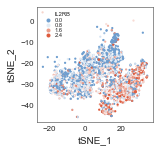

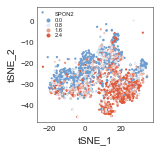

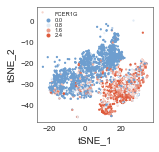

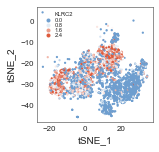

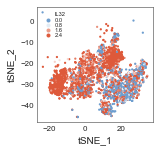

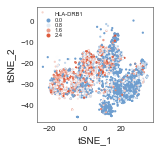

In [142]:

outDir='../Figures/'
MarkerGenes=list(['IL2RB','SPON2','FCER1G','KLRC2','IL32','HLA-DRB1'])
ExpType='Scanpy'
MGExpDFSeurat=Exp.loc[MarkerGenes].dropna(axis=0,how='all').T
SingleGeneExp_intSNE(MetaDF_NK,MGExpDFSeurat,ExpType,['IL2RB','SPON2','FCER1G','KLRC2','IL32','HLA-DRB1'],0,2)


# Fig. 2d

#See scRNA_calculateAUC_inDiseaseSignatiure.r

In [143]:
#/Users/huangbeibei/Desktop/Aging/ANALYSIS_AggrYDOD/FinalUsed_varGenes2400_CCA20_PCA25_Res0.29_DimRedUMAP/NK1NK2/AUC_Disease/All_Disease_defulat
#Script for calculate single cell disease signature: scRNA_calculateAUC_inDiseaseSignatiure.r
#Disease signature genes: Supplementary Table 8 DiseaseSignature in Fig2e.xlsx
#input expression matrix: NK1NK2_ScanpyNormLn.txt


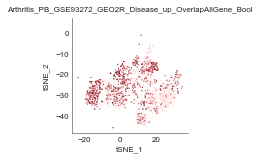

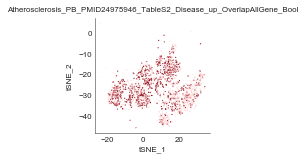

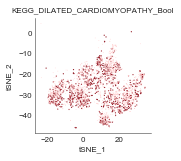

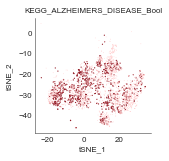

In [155]:
MF='../SourceData/ODYD_Metadata.txt'
MetaDF=pd.read_table(MF,sep='\t',index_col=0)
MetaDF_NK=MetaDF[(MetaDF['CellType']=='NK1')|(MetaDF['CellType']=='NK2')]

BoolColorsDict={1:'#931a25',0:'#ffcbcb'}    
BoolSizeDict={1:1.5,0:0.5} 
DataSetList=['Arthritis_PB_GSE93272_GEO2R_Disease_up_OverlapAllGene','Atherosclerosis_PB_PMID24975946_TableS2_Disease_up_OverlapAllGene','KEGG_DILATED_CARDIOMYOPATHY','KEGG_ALZHEIMERS_DISEASE']   
    
Dir='/Users/huangbeibei/Desktop/2021_AgingNK-Manu/Code_and_SourceData/SourceData/AUCinDisease/out'

outFilePrefix='../Figures/'
def Scatter_Bool(ScatterDF=None,X='tSNE_1',Y='tSNE_2',hue=None,huename=None,sub=None,outFilePrefix=outFilePrefix,hueColorDict=None,hueSizeDict=None,legend=True):
    if legend:
        outfig=outFilePrefix+sub+'for_'+huename+'_Globalk1'+'_bool.Legend.png'
    else:
        outfig=outFilePrefix+sub+'for_'+huename+'_Globalk1'+'_bool.png'
    plt.style.use('seaborn-white')
    fig=plt.figure(figsize=(2,2))
    ax=fig.add_axes([0.15,0.15,0.8,0.8])
    if type(hueColorDict)==str:
        sns.scatterplot(x=X,y=Y,data=ScatterDF,hue=hue,palette=customPalette,s=2,ax=ax,alpha=0.85,edgecolor=None)
        ax.legend(fontsize='small',markerscale=5,ncol=1,edgecolor='k',columnspacing=0.1,labelspacing=0.2,handletextpad=0.1,loc=2)
    elif type(hueColorDict)==dict:
        for h in hueColorDict:
            c=hueColorDict[h]
            s=hueSizeDict[h]
            DFsub=ScatterDF[ScatterDF[hue]==h]
            ax.scatter(DFsub[X],DFsub[Y],c=c,s=s,label=h,edgecolor='none',alpha=1)
        if legend:
            ax.legend(fontsize='small',markerscale=5,ncol=1,edgecolor='k',columnspacing=0,labelspacing=0,handletextpad=0,loc=2)
    ax.set_title(hue,fontsize=8)
    ax.tick_params(axis='x',labelsize=8)
    ax.tick_params(axis='y',labelsize=8)
    ax.set_xlabel(X,fontsize=8)
    ax.set_ylabel(Y,fontsize=8)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.0)
    ax.spines['top'].set_linewidth(0.0)
    #ax.set_xlim([-8,6])
    #ax.set_ylim([-6.5,6.5])
    fig.savefig(outfig,dpi=500)
    plt.show()
    plt.close('all')
    
    
for i in DataSetList:

    cellsAUC_value_F=Dir+'{}_cellsAUC_value.txt'.format(i)
    cellsAUC_value=pd.read_table(cellsAUC_value_F,sep='\t',index_col=0)
    ret = list(set(list(cellsAUC_value.index)).intersection(set(list(MetaDF_NK.index))))
    cellsAUC_value=cellsAUC_value.loc[list(ret)]
    #cellsAUC_value=cellsAUC_value.apply(meanCenter,axis=0,result_type='broadcast')
    AllGene_MetaDF=MetaDF_NK.loc[list(ret)]

    AllGene_MetaDF[i]=cellsAUC_value[i]
    #Blues 、Purples、GnBu、RdGy
    #Scatter_value(AllGene_MetaDF,hue=i,huename=i,sub='AllGenes',hueColorDict='GnBu',legend=False)
    
    threshold_F=Dir+'{}_cellsAUC_threshold.txt'.format(i)
    threshold=pd.read_table(threshold_F,sep='\t',index_col=0)
    
    xz=str(i)+str('_')+str('Bool')
    AllGene_MetaDF[xz] = AllGene_MetaDF[i].apply(lambda x: 1 if x>=threshold['Global_k1'][0] else 0)
    
    Scatter_Bool(AllGene_MetaDF,hue=xz,huename=i,sub='AllGenes',hueColorDict=BoolColorsDict,hueSizeDict=BoolSizeDict,legend=False)

AllGene_MetaDF.to_csv('/Users/huangbeibei/Desktop/2021_AgingNK-Manu/Code_and_SourceData/SourceData/AUCinDisease/NK1NK2_Global_k1_inDiseaseSignature_Metadata.txt'.format(i),sep='\t')



# Fig. 2e & Fig. 2f

In [177]:
MF='../SourceData/NK1NK2_Global_k1_inDiseaseSignature_Metadata_Fig2d-g.txt'
MetaDF=pd.read_table(MF,sep='\t',index_col=0)
MetaDF_NK=MetaDF[(MetaDF['CellType']=='NK1')|(MetaDF['CellType']=='NK2')]

DataSetList=['Arthritis_PB_GSE93272_GEO2R_Disease_up_OverlapAllGene','Atherosclerosis_PB_PMID24975946_TableS2_Disease_up_OverlapAllGene','KEGG_DILATED_CARDIOMYOPATHY','KEGG_ALZHEIMERS_DISEASE']   

print ('AUC count (%):')
for i in DataSetList:
    NK1=MetaDF_NK[MetaDF_NK['CellType']=='NK1']
    NK1bool=NK1[NK1['{}_Bool'.format(i)]==1]
    NK2=MetaDF_NK[MetaDF_NK['CellType']=='NK2']
    NK2bool=NK2[NK2['{}_Bool'.format(i)]==1]
    print (i,',',(len(NK1bool)/len(NK1))*100,',',(len(NK2bool)/len(NK2))*100)
    
print ()
print ('AUC Value NK2 vs NK1 (P-value):')
for i in DataSetList:
    T=stats.ttest_ind(list(MetaDF_NK[MetaDF_NK['CellType']=='NK1'][i]), list(MetaDF_NK[MetaDF_NK['CellType']=='NK2'][i]))
    print (i,T[1],',',(log10(T[1])))



AUC count (%):
Arthritis_PB_GSE93272_GEO2R_Disease_up_OverlapAllGene , 13.511390416339356 , 30.428769017980635
Atherosclerosis_PB_PMID24975946_TableS2_Disease_up_OverlapAllGene , 14.689709347996857 , 31.02812355924389
KEGG_DILATED_CARDIOMYOPATHY , 23.88059701492537 , 24.942369755647764
KEGG_ALZHEIMERS_DISEASE , 19.638648860958366 , 27.93914246196404

AUC Value NK2 vs NK1 (P-value):
Arthritis_PB_GSE93272_GEO2R_Disease_up_OverlapAllGene 5.73751979856853e-37 , 36.24127580282388
Atherosclerosis_PB_PMID24975946_TableS2_Disease_up_OverlapAllGene 1.8301970981913547e-43 , 42.737502137565976
KEGG_DILATED_CARDIOMYOPATHY 0.40598330975167174 , 0.39149182019557316
KEGG_ALZHEIMERS_DISEASE 1.8268657302043754e-09 , 8.738293370969402


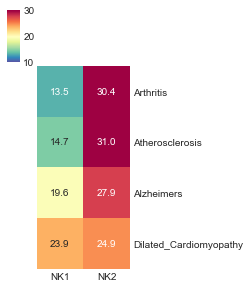

In [170]:
F='../SourceData/NK1NK2_Global_k1_inDiseaseSignature_AUCcount_Fig2e.txt'
DF=pd.read_table(F,sep='\t',index_col=0)
#RdYlBu_r
fig1=sns.clustermap(DF,cmap='Spectral_r',figsize=(3.5,4),fmt='.1f',annot=True,vmin=10,vmax=30,row_cluster=False,col_cluster=False,linecolor=None)
fig1.savefig('../Figures/NK1NK2_Global_k1_inDiseaseSignature_AUCcount_Fig2e.pdf')
plt.show()
plt.close()  

# Fig. 3b

#See: "O7Y7_Seurat3.0.R"

Cell information data: ../SourceData/O7Y7_Metadata.txt

In [593]:
#Source Data: 

F='../SourceData/O7Y7_Metadata.txt'
DF=pd.read_table(F,sep='\t',index_col=0)

#UMAP1 and UMAP2

print ('All cell number: ',len(DF))
for i in list(set(DF['Age'])):
    DFs=DF[DF['Age']==i]
    print (i, ' cell number: ',len(DFs))
    
CellTypeDictt={'NKpro':'#dadada','Nkbright':'#8B88FF','MatureNK':'#23B5AF','AdapativeNK_1':'#235789','AdapativeNK_2':'#dd2a7b','AdapativeNK_3':'#ffeead','AdapativeNK_4':'#A7E8BD'}


All cell number:  12234
Y  cell number:  5501
O  cell number:  6733


In [211]:
for i in list(set(DF['CellType'])):
    print (i)

NK T-like
Nkbright
NK2.2
NK2.1
NK2.3
Nkcytoxic


# Fig. 3c

In [278]:
#Markergene: Jaccard Index

#step2:
#需要改：ClusterList + CellType_aggr,看metaDF
#Ps: NKpro cells < 100, so excluded it

I=['NK1','NK2']
J=['Nkbright','Nkcytoxic','NK2.1','NK2.2','NK2.3','NKT-like']

Dir='../SourceData/'
MarkerODYDF=Dir+'ODYD_CellType_MarkerGenes_Top30.txt'
MarkerODYD=pd.read_table(MarkerODYDF,sep='\t',index_col=0)
MarkerO7Y7F=Dir+'O7Y7_CellType_MarkerGenes_Top30.txt'
MarkerO7Y7=pd.read_table(MarkerO7Y7F,sep='\t',index_col=0)


def ClusterJaccardIndex(j):
    with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
        f.write('%s\t'%(j))
    for i in I:
        AggrDF_step=MarkerODYD[MarkerODYD['cluster']==i]
        OurDF_step=MarkerO7Y7[MarkerO7Y7['cluster']==j]
        
        #交集和并集
        a=list(set(list(AggrDF_step['gene'])).intersection(set(list(OurDF_step['gene']))))
        b=list(set(list(AggrDF_step['gene'])).union((set(list(OurDF_step['gene'])))))
        c=float(len(a))/float(len(b))
        with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
            f.write('%s\t'%(c))
            
    with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
        f.write('\n')
        

for cluster in J:
    ClusterJaccardIndex(cluster)        

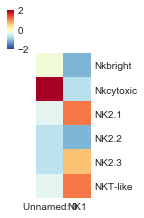

In [285]:
#step3: 画图
Dir='../SourceData/'
PlotF=Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt'
PlotDF=pd.read_table(PlotF,sep='\t',index_col=0)
PlotDF=PlotDF.dropna(axis=1,how='all') 
PlotDF_Z =PlotDF.apply(scipy.stats.zscore,axis=0,result_type='broadcast')

#vmin=0.0,vmax=1.5,GnBu,BuPu

fig=sns.clustermap(PlotDF_Z,cmap='RdYlBu_r',figsize=(2,3),vmin=-2,vmax=2,row_cluster=False,col_cluster=False,linecolor=None)
plt.savefig('../Figures/CellsCluster_JaccardIndexZscore_Top30_Fig3c.pdf')
plt.show()


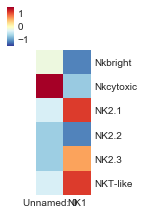

In [277]:
#step3: 画图
Dir='../SourceData/'
PlotF=Dir+'CellsCluster_JaccardIndex_Top30_2.txt'
PlotDF=pd.read_table(PlotF,sep='\t',index_col=0)
PlotDF=PlotDF.dropna(axis=1,how='all') 
PlotDF_Z =PlotDF.apply(scipy.stats.zscore,axis=0,result_type='broadcast')
#vmin=0.0,vmax=1.5,GnBu,BuPu,Spectral_r

fig=sns.clustermap(PlotDF_Z,cmap='RdYlBu_r',figsize=(2,3),vmin=-1.5,vmax=1.5,row_cluster=False,col_cluster=False,linecolor=None)
#plt.savefig('../Figures/CellsCluster_JaccardIndexZscore_Top30_Fig3c.pdf')
plt.show()


In [247]:
#Markergene: Jaccard Index

#step2:
#需要改：ClusterList + CellType_aggr,看metaDF

I=['NK1','NK2']
J=['Nkbright','MatureNK','AdapativeNK_3','AdapativeNK_2','AdapativeNK_1','AdapativeNK_4','NKpro']

Dir='../SourceData/'
MarkerODYDF=Dir+'ODYD_CellType_MarkerGenes_Top15.txt'
MarkerODYD=pd.read_table(MarkerODYDF,sep='\t',index_col=0)
MarkerO7Y7F=Dir+'O7Y7_CellType2_MarkerGenes_Top15.txt'
MarkerO7Y7=pd.read_table(MarkerO7Y7F,sep='\t',index_col=0)


def ClusterJaccardIndex(j):
    with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
        f.write('%s\t'%(j))
    for i in I:
        AggrDF_step=MarkerODYD[MarkerODYD['cluster']==i]
        OurDF_step=MarkerO7Y7[MarkerO7Y7['cluster']==j]
        
        #交集和并集
        a=list(set(list(AggrDF_step['gene'])).intersection(set(list(OurDF_step['gene']))))
        b=list(set(list(AggrDF_step['gene'])).union((set(list(OurDF_step['gene'])))))
        c=float(len(a))/float(len(b))
        with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
            f.write('%s\t'%(c))
            
    with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
        f.write('\n')
        

for cluster in J:
    ClusterJaccardIndex(cluster)        

In [ ]:
#Markergene: Jaccard Index

#step2:
#需要改：ClusterList + CellType_aggr,看metaDF

I=['NK1','NK2']
J=['Nkbright','Nkcytoxic','NK2.1','NK2.2','NK2.3','NKT-like']

Dir='../SourceData/'
MarkerODYDF=Dir+'ODYD_CellType_MarkerGenes_Top15.txt'
MarkerODYD=pd.read_table(MarkerODYDF,sep='\t',index_col=0)
MarkerO7Y7F=Dir+'O7Y7_CellType_MarkerGenes_Top15.txt'
MarkerO7Y7=pd.read_table(MarkerO7Y7F,sep='\t',index_col=0)


def ClusterJaccardIndex(j):
    with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
        f.write('%s\t'%(j))
    for i in I:
        AggrDF_step=MarkerODYD[MarkerODYD['cluster']==i]
        OurDF_step=MarkerO7Y7[MarkerO7Y7['cluster']==j]
        
        #交集和并集
        a=list(set(list(AggrDF_step['gene'])).intersection(set(list(OurDF_step['gene']))))
        b=list(set(list(AggrDF_step['gene'])).union((set(list(OurDF_step['gene'])))))
        c=float(len(a))/float(len(b))
        with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
            f.write('%s\t'%(c))
            
    with open(Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt','a+') as f:
        f.write('\n')
        

for cluster in J:
    ClusterJaccardIndex(cluster)        

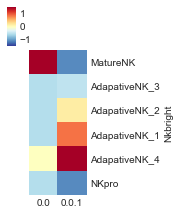

In [248]:
#step3: 画图
Dir='../SourceData/'
PlotF=Dir+'CellsCluster_JaccardIndex_Top30_Fig3c.txt'
PlotDF=pd.read_table(PlotF,sep='\t',index_col=0)
PlotDF=PlotDF.dropna(axis=1,how='all') 
#PlotDF_Z =PlotDF.apply(scipy.stats.zscore,axis=0,result_type='broadcast')
#vmin=0.0,vmax=1.5,GnBu,BuPu
PlotDF_Z =PlotDF.apply(scipy.stats.zscore,axis=0,result_type='broadcast')
fig=sns.clustermap(PlotDF_Z,cmap='RdYlBu_r',figsize=(2.5,3),vmin=-1.5,vmax=1.5,row_cluster=False,col_cluster=False,linecolor=None)
#plt.savefig('../Figures/CellsCluster_JaccardIndexZscore_Top30_Fig3c.pdf')
plt.show()


# Fig. 3

In [589]:
#SourceData: O7Y7_Metadata.txt

In [608]:
MF='../SourceData/O7Y7_Metadata.txt'
MetaDF=pd.read_table(MF,sep='\t',index_col=0)

Young=MetaDF[MetaDF['Age']=='Y']
Elder=MetaDF[MetaDF['Age']=='O']


/Users/huangbeibei/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


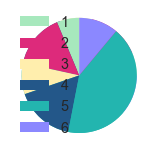

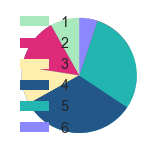

In [610]:
def MajorTypePor(F,i):
    F['CellPor']=[1]*len(F)
    d=F.groupby(['Porcell'])['CellPor'].sum()
    data=d.to_frame() 
    Data=data/sum(data['CellPor'])
    PiePdf='../Figures/CellPro_pie_{}_Fig3d.pdf'.format(i)
    #print (Data)
    fig2=plt.figure(figsize=(2,2))
    ax2=fig2.add_axes([0.10,0.1,1.0,0.95])
    patches1,texts1=ax2.pie(Data['CellPor'],colors=['#A7E8BD','#dd2a7b','#ffeead','#235789','#23B5AF','#8B88FF'])  
    #ClusterDict={'Y7_Nkbright':'#8B88FF','O7_Nkbright':'#8B88FF','Y7_AdapativeNK_1':'#235789','O7_AdapativeNK_1':'#235789','Y7_AdapativeNK_2':'#dd2a7b','O7_AdapativeNK_2':'#dd2a7b','Y7_AdapativeNK_3':'#ffeead','O7_AdapativeNK_3':'#ffeead'}
    #'#235789','#ffeead','#dd2a7b','#8B88FF'
    #ax2.legend(patches1,sorted(Data.index,reverse=True),loc='center left',fancybox=False,edgecolor='none',fontsize='x-large')
    ax2.legend(patches1,Data.index,loc='center left',fancybox=False,edgecolor='none',fontsize='x-large')
    #
    plt.axis('equal')
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 1, 8)]
    plt.pie(Data['CellPor'], shadow=False, startangle=90,colors=['#A7E8BD','#dd2a7b','#ffeead','#235789','#23B5AF','#8B88FF'])
    fig2.savefig(PiePdf)
    plt.show()
    #print Data[9]
    
MajorTypePor(Young,'Young')
MajorTypePor(Elder,'Elder')



In [603]:

DF=Young.copy()
for i in list(set(DF['CellType'])):
    DFs=DF[DF['CellType']==i]
    print (i, len(DFs)/len(DF)*100)

NKT-like 6.307944010179966
Nkbright 11.052535902563172
NK2.2 8.780221777858571
NK2.1 16.651517905835302
NK2.3 15.197236866024358
Nkcytoxic 42.01054353753863


In [604]:

DF=Elder.copy()
for i in list(set(DF['CellType'])):
    DFs=DF[DF['CellType']==i]
    print (i, len(DFs)/len(DF)*100)

NKT-like 8.15386900341601
Nkbright 5.12401604039804
NK2.2 10.6044853705629
NK2.1 32.57091935244319
NK2.3 14.362097133521463
Nkcytoxic 29.184613099658396


# Fig. 3d

Top20 DEGs in each cluster (remove duplicate gene)

In [ ]:
#Source Data: 
#O7Y7_CellType_MarkerGenes_Top30.txt

In [287]:
F='../SourceData/O7Y7_ColorDF.txt'
ColorDF=pd.read_table(F,sep='\t',index_col=0)
F='../SourceData/O7Y7_Metadata.txt'
MetaDF=pd.read_table(F,sep='\t',index_col=0)
ScanpyNormLnF='../SourceData/IntegrateO7Y7_ScanpyNormLn.txt'
ScanpyNormLn=pd.read_table(ScanpyNormLnF,sep='\t',index_col=0)
ScanpyNormLn=ScanpyNormLn[list(MetaDF.index)]
print (ScanpyNormLn.shape[0])
print (ScanpyNormLn.shape[1])

16407
12234


In [310]:
def GeneSetHeatmap_inCells(Dir,label,GeneList,Cells,ExpDF,CellColor):
    GeneList_ExpDF=ExpDF.loc[GeneList]
    GeneList_ExpDF=GeneList_ExpDF[Cells]

    GeneList_ExpDF=GeneList_ExpDF.drop_duplicates(subset = None, keep = 'first')
    GeneList_ExpDF_Z=GeneList_ExpDF.apply(scipy.stats.zscore,axis=1,result_type='broadcast')

    fig1=sns.clustermap(GeneList_ExpDF_Z,cmap=cc,figsize=(5,8),col_colors=ColorDF,row_cluster=False,col_cluster=False,center=0,vmin=-2.5, vmax=2)
    #GeneList_ExpDF_Z.to_csv('/Users/huangbeibei/Desktop/Aging/ANALYSIS_YDOD/varGenes2400_CCA20_PCA25_Res0.3_DimRedTSNE/MultiGeneExp_inCluster_ViolinPlot/AllCluster_Old_vs_Young.zscore.txt',sep='\t')
    #RdYlBu_r、RdYlBu
    outfig1=Dir+File[0:-3]+'{}.png'.format(label)
    plt.setp(fig1.ax_heatmap.get_yticklabels(), rotation=0, fontsize=5)
    plt.setp(fig1.ax_heatmap.get_xticklabels(), rotation=0, fontsize=0)
    fig1.savefig(outfig1,dpi=500)
    plt.show()
    

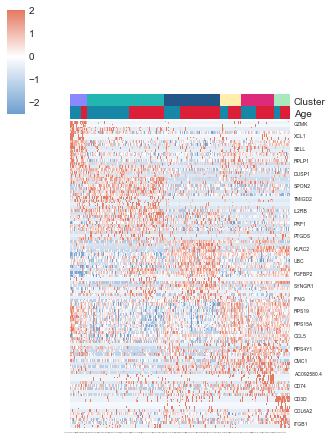

In [314]:
###基因集GeneList文件并将基因写入列表Row_Genes + 文件目录Dir + 需要展示的细胞Col_Cells
Dir='../SourceData/'
###
File='O7Y7_CellType_MarkerGenes_Top20_removeDup_Fig3d.txt'
DirFile=Dir+File
GeneDF=pd.read_table(DirFile,sep='\t',index_col=0)
Row_Genes=list(GeneDF['gene'])
Col_Cells=Cells_All


GeneSetHeatmap_inCells(Dir,'ScanpyNormLn',Row_Genes,Col_Cells,ScanpyNormLn,ColorDF)


# Fig. 3e

GOterm of (Top20 DEGs in each cluster)

In [ ]:
#Supplementary Supplementary Table 3_CellTypeMarker_inFig3b.xlsx
#Fig. 3e : GOterm of Top20 DEGs (Supplementary Table 2_Fig1e_NK1vsNK2_DEGene_and_Fig2a_GOterm.xlsx : NK1_vs_NK2_DEG)



No handles with labels found to put in legend.


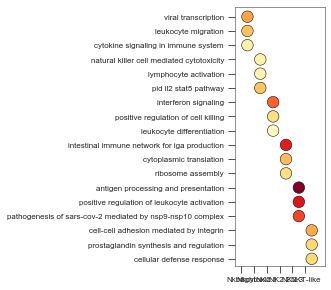

In [341]:

F='../SourceData/NKsubpopulations_GOBP_Selectedterm_Forplot_Fig3e.txt'
DF=pd.read_table(F,sep='\t',index_col=0)
Sample=list(DF)
y=[0.5+i for i in range(len(DF))]
x=[0.5+i for i in range(len(list(DF)))]
Ylim=[0,y[-1]+0.7]
Xlim=[0.0,7.0]
X=[]
Y=[]
C=[]

Header=list(DF)
for i in range(len(list(DF))):
    Col=Header[i]
    C=C+list(DF[Col])

    X=X+[1+i]*len(DF)
    Y=Y+y
    

    
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(2.5,4))
ax=fig.add_axes([0.3,0.08,0.5,0.9])
ax.set_xlim(Xlim)
ax.set_ylim(Ylim)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(list(DF),rotation=0)
ax.set_yticklabels(list(DF.index))
ax.scatter(X,Y,c=C,cmap='YlOrRd',s=133,vmax=12,vmin=3,alpha=1,edgecolors='black',linewidths=0.5)
ax.grid(which='minor', axis='y', linewidth=0.0, linestyle='-', color='white')
ax.tick_params(axis='y',length=7,labelsize=8,direction='out')
ax.tick_params(axis='x',length=7,labelsize=8,direction='out')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.legend()
ax.grid(False)
outfig='../Figures/NKsubpopulations_GOBP_Selectedterm_Forplot_Fig3e.pdf'
plt.savefig(outfig)

plt.show()  

# Fig. 3g

In [ ]:
##Source Data = O7Y7_Metadata.txt

# Fig. 3g 

In [550]:
#Data Source: ODYD_Metadata.txt
#Data Source: ODYD_CelPorporation_log2OvsY_Fig1c.xlsx
F='../SourceData/O7Y7_Metadata.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

Elder=DF[DF['Age']=='O']
Young=DF[DF['Age']=='Y']

print ('cells from Young: ',len(Young))
S=['nCount_RNA','nFeature_RNA','percent.mt']
Y_QC=Young[S].apply(np.median)
print (Y_QC)
print ('')
print ('cells from Elder: ',len(Elder))
S=['nCount_RNA','nFeature_RNA','percent.mt']
E_QC=Elder[S].apply(np.median)
print (E_QC)

 




cells from Young:  5501
nCount_RNA      5247.000000
nFeature_RNA    1853.000000
percent.mt         7.456707
dtype: float64

cells from Elder:  6733
nCount_RNA      4958.000000
nFeature_RNA    1792.000000
percent.mt         6.971947
dtype: float64


In [342]:
#Data Source: ODYD_Metadata.txt
#Data Source: ODYD_CelPorporation_log2OvsY_Fig1c.xlsx
F='../SourceData/O7Y7_Metadata.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

Elder=DF[DF['Age']=='O']
Young=DF[DF['Age']=='Y']


def CelNum(DF,Type):
    DF=DF[DF['CellType']==Type]
    print (Type, len(DF))
    
C=sorted(list(set(list(DF['CellType']))))

print ('Cluster cell number (Elder):')
for i in C:
    CelNum(Elder,i)
    
print ('Cluster cell number (Young):')
for i in C:
    CelNum(Young,i)


Cluster cell number (Elder):
NK T-like 549
NK2.1 2193
NK2.2 714
NK2.3 967
Nkbright 345
Nkcytoxic 1965
Cluster cell number (Young):
NK T-like 347
NK2.1 916
NK2.2 483
NK2.3 836
Nkbright 608
Nkcytoxic 2311


No handles with labels found to put in legend.


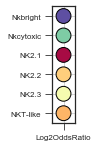

In [350]:
F='../SourceData/O7Y7_CelPorporation_log2OvsY_Fig3g.xlsx'
DF=pd.read_excel(F,index_col=0)
DF

DFs=DF['Log2OddsRatio'].to_frame()
#散点图
Sample=list(DFs)
y=[1+i for i in range(len(DFs))]
x=[1+i for i in range(len(list(DFs)))]
Ylim=[0.5,y[-1]+0.5]
Xlim=[0.5,1.5]
X=[]
Y=[]
C=[]
Header=list(DFs)
for i in range(len(list(DFs))):
    Col=Header[i]
    C=C+list(DFs[Col])
    X=X+[1+i]*len(DFs)
    Y=Y+y
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(0.65,1.8))
ax=fig.add_axes([0.3,0.08,0.5,0.9])
ax.set_xlim(Xlim)
ax.set_ylim(Ylim)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(list(DFs),rotation=0)
ax.set_yticklabels(list(DFs.index))
ax.scatter(X,Y,c=C,cmap='Spectral_r',s=220,alpha=1,vmin=-1,vmax=1,edgecolors='black')
ax.grid(which='minor', axis='y', linewidth=0.75, linestyle='-', color='white')
ax.tick_params(axis='y',length=7,labelsize=8,direction='out')
ax.tick_params(axis='x',length=7,labelsize=8,direction='out')
ax.legend()
ax.grid(True)
outfig='../Figures/O7Y7_CelPorporation_log2OvsY_Fig3g.pdf'
plt.savefig(outfig)

plt.show()  

# Fig. 3h

#See "PAGA_inO7Y7_Fig3h.jupyter"

# Fig. 3i

See "FindMarkers_For_DEG.R"

See"Normalization_for_scRNA.py"

In [351]:
#SourceData: /SourceData/Metascape/OvsY_inO7Y7
#code for find DEG: FindMarkers_For_DEG.R
#DEG_number_OvsY_inO7Y7_Fig3i.txt


No handles with labels found to put in legend.


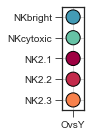

In [657]:
#读入处理好的28个module的打分值文件
F='../SourceData/DEG_number_OvsY_inO7Y7_Fig3i.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)
#散点图
GXR = DF.copy()
Sample=list(GXR)
y=[1+i for i in range(len(GXR))]
x=[1+i for i in range(len(list(GXR)))]
Ylim=[0.5,y[-1]+0.5]
Xlim=[0.5,1.5]
X=[]
Y=[]
C=[]
Header=list(GXR)
for i in range(len(list(GXR))):
    Col=Header[i]
    C=C+list(GXR[Col])
    X=X+[1+i]*len(GXR)
    Y=Y+y
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(0.6,1.6))
ax=fig.add_axes([0.3,0.08,0.5,0.9])
ax.set_xlim(Xlim)
ax.set_ylim(Ylim)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(list(GXR),rotation=0)
ax.set_yticklabels(list(GXR.index))
ax.scatter(X,Y,c=C,cmap='Spectral_r',s=200,alpha=1,vmin=30,vmax=60,edgecolors='black')
ax.grid(which='minor', axis='y', linewidth=0.75, linestyle='-', color='white')
ax.tick_params(axis='y',length=7,labelsize=10,direction='out')
ax.tick_params(axis='x',length=7,labelsize=10,direction='out')
ax.legend()
ax.grid(True)
outfig='../Figures/DEG_number_OvsY_inO7Y7_Fig3i.pdf'
plt.savefig(outfig)

plt.show()  

#Elder vs Young up DEG number

In [ ]:
#Source Data

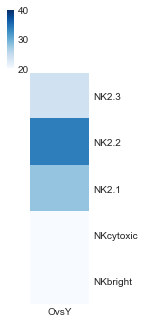

In [648]:
F='../SourceData/DEG_number_YvsO_up_inO7Y7_Fig7h.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

fig=sns.clustermap(DF,figsize=(2,4.5),cmap='Blues',row_cluster=False,col_cluster=False,vmax=40,vmin=20)
   

No handles with labels found to put in legend.


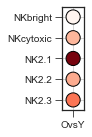

In [655]:
#读入处理好的28个module的打分值文件
F='../SourceData/DEG_number_OvsY_up_inO7Y7_Fig7h.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)
#散点图
GXR = DF.copy()
Sample=list(GXR)
y=[1+i for i in range(len(GXR))]
x=[1+i for i in range(len(list(GXR)))]
Ylim=[0.5,y[-1]+0.5]
Xlim=[0.5,1.5]
X=[]
Y=[]
C=[]
Header=list(GXR)
for i in range(len(list(GXR))):
    Col=Header[i]
    C=C+list(GXR[Col])
    X=X+[1+i]*len(GXR)
    Y=Y+y
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(0.6,1.6))
ax=fig.add_axes([0.3,0.08,0.5,0.9])
ax.set_xlim(Xlim)
ax.set_ylim(Ylim)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(list(GXR),rotation=0)
ax.set_yticklabels(list(GXR.index))
ax.scatter(X,Y,c=C,cmap='Reds',s=200,alpha=1,vmin=15,vmax=45,edgecolors='black')
ax.grid(which='minor', axis='y', linewidth=0.75, linestyle='-', color='white')
ax.tick_params(axis='y',length=7,labelsize=10,direction='out')
ax.tick_params(axis='x',length=7,labelsize=10,direction='out')
ax.legend()
ax.grid(True)
outfig='../Figures/DEG_number_OvsY_up_inO7Y7_Fig7h.pdf'
plt.savefig(outfig)

plt.show()  

No handles with labels found to put in legend.


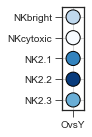

In [656]:
#读入处理好的28个module的打分值文件
F='../SourceData/DEG_number_YvsO_up_inO7Y7_Fig7h.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)
#散点图
GXR = DF.copy()
Sample=list(GXR)
y=[1+i for i in range(len(GXR))]
x=[1+i for i in range(len(list(GXR)))]
Ylim=[0.5,y[-1]+0.5]
Xlim=[0.5,1.5]
X=[]
Y=[]
C=[]
Header=list(GXR)
for i in range(len(list(GXR))):
    Col=Header[i]
    C=C+list(GXR[Col])
    X=X+[1+i]*len(GXR)
    Y=Y+y
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(0.6,1.6))
ax=fig.add_axes([0.3,0.08,0.5,0.9])
ax.set_xlim(Xlim)
ax.set_ylim(Ylim)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(list(GXR),rotation=0)
ax.set_yticklabels(list(GXR.index))
ax.scatter(X,Y,c=C,cmap='Blues',s=200,alpha=1,vmin=13,vmax=35,edgecolors='black')
ax.grid(which='minor', axis='y', linewidth=0.75, linestyle='-', color='white')
ax.tick_params(axis='y',length=7,labelsize=10,direction='out')
ax.tick_params(axis='x',length=7,labelsize=10,direction='out')
ax.legend()
ax.grid(True)
outfig='../Figures/DEG_number_YvsO_up_inO7Y7_Fig7h.pdf'
plt.savefig(outfig)

plt.show()  

# Fig. 4a

In [ ]:
#SourceData: /SourceData/Metascape/OvsY_inO7Y7
#DEG_number_OvsY_inO7Y7_Fig3i.txt


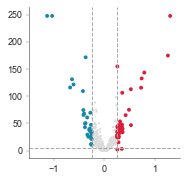

In [552]:
##step1:参数

def log10(L):return -math.log(L,10)
Cell='NK2.1'
#C=['gainsboro','#1687A7','#DC1F38']
C=['gainsboro','#DC1F38','#1687A7']
F='../SourceData/Metascape_and_DEG/OvsY_inO7Y7/Fc0.0/{}_OvsY.allgene.txt'.format(Cell)
Dif=pd.read_table(F,sep='\t',index_col=0)
Dif['logP']=Dif['p_val'].apply(log10)

Dif_O=Dif[Dif['avg_logFC']>=0.25]
Dif_Y=Dif[Dif['avg_logFC']<=-0.25]

plt.style.use('seaborn-white')
fig=plt.figure(figsize=(3,3))
ax=fig.add_axes([0.2,0.2,0.7,0.7])
ax.tick_params(axis='y',length=3,labelsize=9,direction='out',width=0.25)
ax.tick_params(axis='x',length=3,labelsize=9,direction='out',width=0.25)
ax.set_xlim([-1.5,1.5]) 
#ax.set_ylim([-0.2,0.4])

ax.scatter(Dif['avg_logFC'],Dif['logP'],c=C[0],alpha=1,s=5,edgecolor='none')    
ax.scatter(Dif_O['avg_logFC'],Dif_O['logP'],c=C[1],alpha=1,s=15,edgecolor='none')    
ax.scatter(Dif_Y['avg_logFC'],Dif_Y['logP'],c=C[2],alpha=1,s=15,edgecolor='none')   

ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.0)
ax.spines['top'].set_linewidth(0.0)
ax.axvline(x=0.25,ls='--',color='darkgray',alpha=1,linewidth=1)
ax.axvline(x=-0.25,ls='--',color='darkgray',alpha=1,linewidth=1)
ax.axhline(y=5,ls='--',color='darkgray',alpha=1,linewidth=1)
outfig='../Figures/{}_OvsY.allgene.png'.format(Cell)
plt.savefig(outfig,dpi=1000)
plt.show()

# Fig. 4b

#SourceData: SourceData/Metascape_and_DEG/OvsY_inO7Y7 
#Metasacpe resluts: Supplementary Table 4_Fig4A_OvsYDEgene_GOterm.xlsx


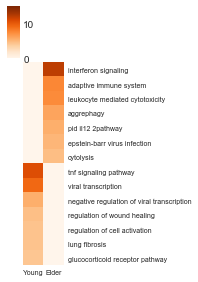

In [585]:
F='../SourceData/Metascape_and_DEG/OvsY_inO7Y7/NK2.1_OvsY.Metasacpe.txt'
DF=pd.read_table(F,sep='\t',index_col=0)

fig=sns.clustermap(DF,cmap='Oranges',figsize=(3.5,4),vmin=0,vmax=15,row_cluster=False,col_cluster=False,linecolor=None)
plt.setp(fig.ax_heatmap.get_xticklabels(),fontsize=7)
plt.setp(fig.ax_heatmap.get_yticklabels(),rotation=0,fontsize=7)
plt.savefig('../Figures/NK2.1_OvsY.Metasacpe_Fig4b.pdf')
plt.show()


# Fig. 4c

#SCENIC analysis : SCENIC_forTFs.R

In [371]:
#SourceData: pheatmap_regulonActivity_byCellType.txt
#Correspondence of cluster name
#YANK1 = NK2.1_Y, YANK2 = NK2.3_Y, YANK3 = NK2.3_Y, YONK1 = NK2.1_O, OANK2 = NK2.3_O, OANK3 = NK2.3_O, 

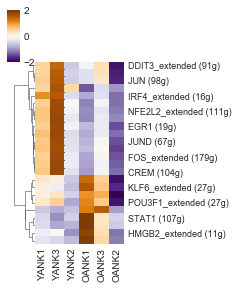

In [370]:
F='../SourceData/SCENIC/pheatmap_regulonActivity_byCellType.txt'
DF=pd.read_table(F,sep='\t',index_col=0)

S=['YANK1','YANK3','YANK2','OANK1','OANK3','OANK2']
DF=DF[S]

#DF=DF[DF.apply(Range,axis=1)>0.05]
#len(DF)

List1=list((DF[DF['OANK1']-DF['YANK1']>0.03]).index)
List2=list((DF[DF['OANK2']-DF['YANK2']>0.03]).index)
List3=list((DF[DF['OANK3']-DF['YANK3']>0.03]).index)
List4=list((DF[DF['OANK1']-DF['YANK1']<-0.03]).index)
List5=list((DF[DF['OANK2']-DF['YANK2']<-0.03]).index)
List6=list((DF[DF['OANK3']-DF['YANK3']<-0.03]).index)
List=list(set(List1+List2+List3+List4+List5+List6))
DF=DF.loc[List]
#S=['OANK1','OANK3','OANK2']
#DF=DF[S]

#DF['rank']=DF['OANK1']-DF['OANK3']
#DF=DF.sort_values('rank',ascending=False)

#del DF['rank']

TFs_range_z = DF.apply(scipy.stats.zscore,axis=1,result_type='broadcast')

#G=['']
fig1=sns.clustermap(TFs_range_z,figsize=(3.5,4),vmin=-2,vmax=2,col_cluster=False,method='average',row_cluster=True,cmap='PuOr_r')                    
fig1.savefig('../Figures/pheatmap_regulonActivity_byCellType')
plt.setp(fig1.ax_heatmap.get_yticklabels(), rotation=0,fontsize=9)
plt.setp(fig1.ax_heatmap.get_xticklabels(), rotation=90)

plt.show()  



# Fig. 4d/e

#d: gene expression
#e: motif activity
#Cell location infor: O7Y7_Metadata.txt (UMAP1, UMAP2)

In [376]:
AUCF='../SourceData/SCENIC//regulonAUC.txt'
AUC=pd.read_table(AUCF,sep='\t',index_col=0)
AUC.head()


,AAACCCACAATGACCT-1,AAACCCAGTCTGTCAA-1,AAACCCATCAAAGACA-1,AAACCCATCTGAGAGG-1,AAACGAAAGGGTTAGC-1,AAACGAAAGTAAACAC-1,AAACGAAGTTGAGGAC-1,AAACGCTCACCAAAGG-1,AAACGCTGTCAAACGG-1,AAAGAACAGGTGCCTC-1,...,TTCACCGAGCATGCAG-2,TTCAGGATCTGGGCGT-2,TTCCACGCAGCGGTCT-2,TTCGATTAGTCATGGG-2,TTGAACGCACAACGTT-2,TTGACCCCAAGTATCC-2,TTGGATGCAACACAGG-2,TTTAGTCCAGTTCACA-2,TTTCCTCGTCCAGAAG-2,TTTGTTGTCGATTGAC-2
IRF7 (138g),0.258648,0.289855,0.290913,0.236221,0.270496,0.299058,0.281604,0.228499,0.277690,0.337036,...,0.132868,0.182376,0.179097,0.140485,0.114567,0.124088,0.118481,0.116577,0.121549,0.095419
IRF9 (80g),0.168590,0.119231,0.176026,0.122179,0.133846,0.130128,0.111026,0.088718,0.139231,0.184744,...,0.128590,0.112564,0.103462,0.101923,0.114359,0.099872,0.116410,0.125000,0.096923,0.117692
STAT1 (107g),0.174900,0.142190,0.181909,0.166778,0.186805,0.150868,0.178238,0.158433,0.200267,0.191923,...,0.088451,0.128505,0.137405,0.112261,0.112817,0.115265,0.135291,0.117379,0.112817,0.110258
KLF10 (15g),0.111282,0.185641,0.174872,0.181026,0.153333,0.152821,0.124615,0.143590,0.186667,0.134359,...,0.085128,0.061026,0.133846,0.116410,0.226667,0.141026,0.120513,0.176410,0.171282,0.130256
BCL6_extended (12g),0.033587,0.137516,0.134347,0.072877,0.106464,0.134347,0.057668,0.067807,0.086819,0.169835,...,0.064005,0.079848,0.083650,0.099493,0.024081,0.058302,0.043093,0.067807,0.096324,0.012674


# Fig .5a,b

#See "Monocle.PickCellByMetadata.R"

# Fig. 5c

In [377]:
#SourceData: ../SourceData/Monocle/Meta_AdapNK.txt

/Users/huangbeibei/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


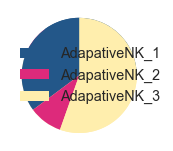

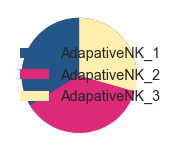

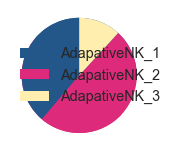

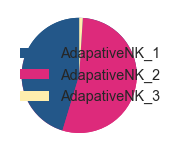

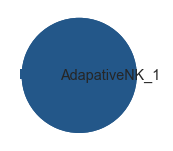

In [587]:
F='../SourceData/Monocle/Meta_AdapNK.txt'
MataForMonocle=pd.read_table(F,sep='\t',index_col=0)
MataForMonocle.head()

Meta=MataForMonocle.copy()
Meta = Meta.sort_values(by=['Pseudotime'], ascending=True)
Meta.head()

#按假时间排序分成五份：
Meta1=Meta[0:int((len(Meta)/5)*1)]
Meta2=Meta[int((len(Meta)/5)*1):int((len(Meta)/5)*2)]
Meta3=Meta[int((len(Meta)/5)*2):int((len(Meta)/5)*3)]
Meta4=Meta[int((len(Meta)/5)*3):int((len(Meta)/5)*4)]
Meta5=Meta[int((len(Meta)/5)*4):int((len(Meta)/5)*5)]

def MajorTypePor(F,i):
    OutDir=os.path.join('../SourceData/Monocle/','MonocleScatterPlot/')
    if not os.path.exists(OutDir):
        os.mkdir(OutDir)

    F['CellPor']=[1]*len(F)
    d=F.groupby(['CellType'])['CellPor'].sum()
    data=d.to_frame() 
    Data=data/sum(data['CellPor'])
    PiePdf=OutDir+'PseTime_{}_Proporation.pdf'.format(i)
    #print (Data)
    fig2=plt.figure(figsize=(2,2))
    ax2=fig2.add_axes([0.10,0.1,1.0,0.95])
    patches1,texts1=ax2.pie(Data['CellPor'],colors=['#235789','#dd2a7b','#ffeead'])  
    #ClusterDict={'Y7_Nkbright':'#8B88FF','O7_Nkbright':'#8B88FF','Y7_AdapativeNK_1':'#235789','O7_AdapativeNK_1':'#235789','Y7_AdapativeNK_2':'#dd2a7b','O7_AdapativeNK_2':'#dd2a7b','Y7_AdapativeNK_3':'#ffeead','O7_AdapativeNK_3':'#ffeead'}
    #'#235789','#ffeead','#dd2a7b','#8B88FF'
    #ax2.legend(patches1,sorted(Data.index,reverse=True),loc='center left',fancybox=False,edgecolor='none',fontsize='x-large')
    ax2.legend(patches1,Data.index,loc='center left',fancybox=False,edgecolor='none',fontsize='x-large')
    #
    plt.axis('equal')
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 1, 8)]
    plt.pie(Data['CellPor'], shadow=False, startangle=90,colors=['#235789','#dd2a7b','#ffeead'])
    fig2.savefig(PiePdf)
    plt.show()
    #print Data[9]
    
MajorTypePor(Meta1,'time1')
MajorTypePor(Meta2,'time2')   
MajorTypePor(Meta3,'time3') 
MajorTypePor(Meta4,'time4') 
MajorTypePor(Meta5,'time5') 





# Fig. 5d

In [391]:
#SourceData: ../SourceData/Monocle/Meta_AdapNK.txt
#SourceData: ../SourceData/Monocle/For_pvalue_DF.txt

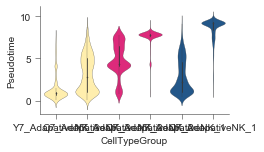

In [385]:
#单个基因表达：
#ITGB1，CXCR6, CXCR4,PIK3R1
#KCNQ1OT1
F='../SourceData/Monocle/For_pvalue_DF.txt'
DF=pd.read_table(F,sep='\t',index_col=0)

Dir='../SourceData/Monocle/'

GeneName='Pseudotime'
GeneDF=DF.copy()
Type='Monocle'
hue='CellTypeGroup'
#CellType2ColorsDict={'NKpro':'#FFC0BE','Nkbright':'#8B88FF','MatureNK':'#23B5AF','AdapativeNK_1':'#235789','AdapativeNK_2':'#dd2a7b','AdapativeNK_3':'#ffeead','AdapativeNK_4':'#A7E8BD'}

ClusterColorsDict={'Y7_AdapativeNK_1':'#235789','O7_AdapativeNK_1':'#235789','Y7_AdapativeNK_2':'#dd2a7b','O7_AdapativeNK_2':'#dd2a7b','Y7_AdapativeNK_3':'#ffeead','O7_AdapativeNK_3':'#ffeead'}
XaxisOrder=['Y7_AdapativeNK_3','O7_AdapativeNK_3','Y7_AdapativeNK_2','O7_AdapativeNK_2','Y7_AdapativeNK_1','O7_AdapativeNK_1']
ColorList=['#ffeead','#ffeead','#dd2a7b','#dd2a7b','#235789','#235789']
ColorDict=ClusterColorsDict

GeneExp=GeneDF[GeneName].to_frame()
MetaDFfilter=DF.copy()
#step2:得到对应的MetaDF，by=hue
hueMataDF=MetaDFfilter[hue].to_frame()

#step3：合并(得到相同索引的交集-CellName)
GenePlotDF = pd.concat([hueMataDF, GeneExp], axis=1, join='inner')
#step4: 画图
#Violinplot
plt.style.use('seaborn-white')
fig1=plt.figure(figsize=(3.5,2))
ax1=fig1.add_axes([0.2,0.2,0.75,0.75])
GenePlotDF['Pseudotime']=GenePlotDF['Pseudotime'].apply(float)
#sns.violinplot(x=hue,y=GeneName,data=GenePlotDF,order=XaxisOrder,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.65,inner="box",saturation=1.0,scale="width")
sns.violinplot(x=hue,y=GeneName,data=GenePlotDF,order=XaxisOrder,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,inner="box",saturation=1.0,scale="width")
#sns.boxplot(x=hue,y=GeneName,data=GenePlotDF,order=XaxisOrder,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,saturation=1.0)

ax1.tick_params(axis='x',length=5,width=0.5,labelsize=10,direction='out')
ax1.tick_params(axis='y',length=5,width=0.5,labelsize=10,direction='out')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.0)
ax1.spines['top'].set_linewidth(0.0)
#ax1.set_ylim([0.2,1.1])
fig1.savefig(Dir+'{}_{}.YO.pdf'.format(Type,GeneName))
plt.show()


# calculate P-value (O vs Y)

#Correspondence of cluster name:
#AdapativeNK_1 = NK2.1
#AdapativeNK_2 = NK2.3
#AdapativeNK_3 = NK2.2

In [390]:
Cell1=list(GenePlotDF[(GenePlotDF['CellTypeGroup']=='O7_AdapativeNK_2') ].index)
Cell2=list(GenePlotDF[(GenePlotDF['CellTypeGroup']=='Y7_AdapativeNK_2') ].index)
O=GenePlotDF.loc[Cell1]
Oscore=list(O['Pseudotime'])
Y=GenePlotDF.loc[Cell2]
Yscore=list(Y['Pseudotime'])
pval=scipy.stats.ranksums(Oscore,Yscore)[1]
pval




1.3268938511555008e-226

# Fig. 5e

In [ ]:
# SourceData: NC2015_Top50_Age_associated_genes_Fig5e.txt
# SourceData: NC2015_Top50_Age_associated_genes_Fig5e.txt
# SourceData: NNC2015_Top50_Age_associated_genes_inAdapNK_NormScore_Fig5e.txt

#Calculate Nomalzied Geneset score

In [410]:
F='../SourceData/O7Y7_Metadata.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

DFs=DF[(DF['CellType']=='NK2.1')|(DF['CellType']=='NK2.2')|(DF['CellType']=='NK2.3')]
ScanpyNormLnF='../SourceData/IntegrateO7Y7_ScanpyNormLn.txt'
ScanpyNormLn=pd.read_table(ScanpyNormLnF,sep='\t',index_col=0)
ScanpyNormLns=ScanpyNormLn[list(DFs.index)]

F='../SourceData/NC2015_Top50_Age_associated_genes_Fig5e.txt'
GeneDF=pd.read_csv(F,sep='\t',index_col=0)
Gene=list(GeneDF['AgeGene'])
Genes=list(set(Gene).intersection(set(list(ScanpyNormLns.index))))



In [416]:
Expz=ScanpyNormLns.loc[Genes].dropna(how='all').T
Expz


,GPR56,FCGBP,GZMH,LTB,ITM2C,FGFBP2,SYT11,PPP2R2B,SCML1,SLC16A10,...,MFGE8,CCR7,BACH2,FCRL6,SUSD3,CD27,FAIM3,BZW2,LEF1,LDHB
Y7_AAACCCAGTCATCCCT,0.000000,0.0,2.189817,0.000000,0.0,2.654834,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.293226,0.0,0.0,0.000000,0.0,0.0,0.842542
Y7_AAACCCATCGCGATCG,1.243864,0.0,2.707447,0.000000,0.0,1.632175,0.600482,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.632175,0.0,0.0,0.000000,0.0,0.0,0.973047
Y7_AAACGAAAGGTTGAGC,0.926116,0.0,1.805379,0.000000,0.0,1.805379,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.410935,0.0,0.0,0.410935,0.0,0.0,0.410935
Y7_AAACGAATCACTCCGT,0.000000,0.0,1.422067,0.000000,0.0,2.683162,0.000000,0.717137,0.0,0.0,...,0.0,0.0,0.0,0.717137,0.0,0.0,0.000000,0.0,0.0,0.717137
Y7_AAAGAACCATCCGTGG,0.573965,0.0,1.974406,0.000000,0.0,2.332485,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.936323,0.0,0.0,0.573965,0.0,0.0,0.936323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O7_TTTGGAGCAATGTTGC,0.000000,0.0,2.223385,0.000000,0.0,2.960514,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.649923,0.0,0.0,0.000000,0.0,0.0,1.539354
O7_TTTGGAGCATCTTTCA,1.479969,0.0,2.888372,0.000000,0.0,1.182301,0.000000,0.756562,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
O7_TTTGGTTAGGTTCATC,1.308104,0.0,2.673856,0.000000,0.0,2.734074,0.641705,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.641705,0.0,0.0,0.641705,0.0,0.0,0.000000
O7_TTTGTTGTCCCGTGAG,0.000000,0.0,2.409424,0.652683,0.0,1.875506,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [415]:
#Cauculate Geneset score(Normalized score)

#Zscore by Gene(each gene across cellsa)
Expz=ScanpyNormLns.loc[Genes].dropna(how='all').T.apply(scipy.stats.zscore,axis=0)
Expz

/Users/huangbeibei/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,GPR56,FCGBP,GZMH,LTB,ITM2C,FGFBP2,SYT11,PPP2R2B,SCML1,SLC16A10,...,MFGE8,CCR7,BACH2,FCRL6,SUSD3,CD27,FAIM3,BZW2,LEF1,LDHB
Y7_AAACCCAGTCATCCCT,-1.391738,-0.133221,0.013369,-0.369164,-0.028265,0.828424,-0.543395,-0.487479,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,1.534005,-0.047204,-0.117785,-0.609497,-0.263709,-0.122159,0.890294
Y7_AAACCCATCGCGATCG,0.751365,-0.133221,0.870108,-0.369164,-0.028265,-0.550543,1.174797,-0.487479,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,2.202849,-0.047204,-0.117785,-0.609497,-0.263709,-0.122159,1.170466
Y7_AAACGAAAGGTTGAGC,0.203903,-0.133221,-0.622919,-0.369164,-0.028265,-0.316992,-0.543395,-0.487479,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,-0.207010,-0.047204,-0.117785,0.483570,-0.263709,-0.122159,-0.036294
Y7_AAACGAATCACTCCGT,-1.391738,-0.133221,-1.257347,-0.369164,-0.028265,0.866622,-0.543395,1.794321,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,0.397215,-0.047204,-0.117785,-0.609497,-0.263709,-0.122159,0.621070
Y7_AAAGAACCATCCGTGG,-0.402830,-0.133221,-0.343160,-0.369164,-0.028265,0.393765,-0.543395,-0.487479,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,0.829732,-0.047204,-0.117785,0.917221,-0.263709,-0.122159,1.091626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O7_TTTGGAGCAATGTTGC,-1.391738,-0.133221,0.068929,-0.369164,-0.028265,1.240607,-0.543395,-0.487479,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,0.264583,-0.047204,-0.117785,-0.609497,-0.263709,-0.122159,2.386232
O7_TTTGGAGCATCTTTCA,1.158159,-0.133221,1.169561,-0.369164,-0.028265,-1.157158,-0.543395,1.919764,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,-1.017903,-0.047204,-0.117785,-0.609497,-0.263709,-0.122159,-0.918503
O7_TTTGGTTAGGTTCATC,0.862045,-0.133221,0.814512,-0.369164,-0.028265,0.935273,1.292750,-0.487479,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,0.248366,-0.047204,-0.117785,1.097406,-0.263709,-0.122159,-0.918503
O7_TTTGTTGTCCCGTGAG,-1.391738,-0.133221,0.376846,2.011907,-0.028265,-0.222432,-0.543395,-0.487479,-0.030755,-0.012795,...,-0.10801,NaN,-0.129884,-1.017903,-0.047204,-0.117785,-0.609497,-0.263709,-0.122159,-0.918503


In [426]:
#Cauculate Geneset score(Normalized score)
#Step1:each gene,Zscore by Gene(each gene across cells)
Expz=ScanpyNormLns.loc[Genes].dropna(how='all').T.apply(scipy.stats.zscore,axis=0)
Expz=Expz.dropna(axis=1, how='any')
Expz=Expz.loc[list(DFs.index)]
Feature=list(Expz.apply(sum,axis=1))

#Step2:each cell,sum expression of gene in the geneset and then, normalzied to (0,1)
Feature=list(Expz.apply(sum,axis=1))
Min=min(Feature)
Range=max(Feature)-Min
FeatureScore=[(i-Min)/(Range+0.0000001) for i in Feature ]
DFs['Normalzied Transcrition Age']=FeatureScore
DFs.to_csv('../SourceData/NC2015_Top50_Age_associated_genes_inAdapNK_NormScore_Fig5e.txt',sep='\t')
DFs.head()

/Users/huangbeibei/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/Users/huangbeibei/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,name1,name2,name3,name4,name5,nCount_RNA,nFeature_RNA,percent.mt,Age,UMAP_1,UMAP_2,CellType,CellTypeGroup,SingleRLabel,doublet_scores,Normalzied Transcrition Age
Y7_AAACCCAGTCATCCCT,AAACCCAGTCATCCCT-2,Y7_AAACCCAGTCATCCCT-1,AAACCCAGTCATCCCT_2,AAACCCAGTCATCCCT-2_2,AAACCCAGTCATCCCT-1_2,3854,1549,8.406850,Y,1.485361,2.032340,NK2.1,Y_NK2.1,NK_cell,0.136364,0.318643
Y7_AAACCCATCGCGATCG,AAACCCATCGCGATCG-2,Y7_AAACCCATCGCGATCG-1,AAACCCATCGCGATCG_2,AAACCCATCGCGATCG-2_2,AAACCCATCGCGATCG-1_2,6192,1951,5.781654,Y,-0.733512,2.169176,NK2.1,Y_NK2.1,NK_cell,0.154696,0.343900
Y7_AAACGAAAGGTTGAGC,AAACGAAAGGTTGAGC-2,Y7_AAACGAAAGGTTGAGC-1,AAACGAAAGGTTGAGC_2,AAACGAAAGGTTGAGC-2_2,AAACGAAAGGTTGAGC-1_2,10027,2788,8.347462,Y,-2.521400,2.637588,NK2.1,Y_NK2.1,NK_cell,0.362398,0.294567
Y7_AAACGAATCACTCCGT,AAACGAATCACTCCGT-2,Y7_AAACGAATCACTCCGT-1,AAACGAATCACTCCGT_2,AAACGAATCACTCCGT-2_2,AAACGAATCACTCCGT-1_2,4860,1909,3.251029,Y,1.703316,4.824421,NK2.1,Y_NK2.1,NK_cell,0.145119,0.223909
Y7_AAAGAACCATCCGTGG,AAAGAACCATCCGTGG-2,Y7_AAAGAACCATCCGTGG-1,AAAGAACCATCCGTGG_2,AAAGAACCATCCGTGG-2_2,AAAGAACCATCCGTGG-1_2,6573,2057,8.124144,Y,2.378938,2.762492,NK2.1,Y_NK2.1,NK_cell,0.132262,0.306032


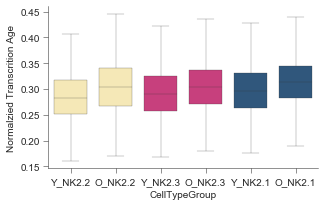

In [431]:
#GenePlotDF.to_csv('NK123_inCellType2Group.txt',sep='\t')
F='../SourceData/NC2015_Top50_Age_associated_genes_inAdapNK_NormScore_Fig5e.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

#DF=DF[(DF['CellType2']=='AdapativeNK_1')|(DF['CellType2']=='AdapativeNK_2')|(DF['CellType2']=='AdapativeNK_3')]
#DF.to_csv('AgeGene_NK123_GeneSetScore_norm01.txt',sep='\t')
plt.style.use('seaborn-white')
fig1=plt.figure(figsize=(5,3))
ax1=fig1.add_axes([0.2,0.2,0.75,0.75])
ColorList=['#ffeead', '#ffeead','#dd2a7b', '#dd2a7b','#235789', '#235789']
sns.boxplot(x='CellTypeGroup',y='Normalzied Transcrition Age',data=DF,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,showfliers=False)
#sns.violinplot(x='Order',y='AgeGene.SeuratVar',data=DF,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,inner="box",saturation=1.0,scale="width")
ax1.tick_params(axis='x',length=5,width=0.5,labelsize=10,direction='out')
ax1.tick_params(axis='y',length=5,width=0.5,labelsize=10,direction='out')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.0)
ax1.spines['top'].set_linewidth(0.0)
#ax1.set_ylim([0.15,0.5])
fig1.savefig('../Figures/NC2015_Top50_Age_associated_genes_inAdapNK_NormScore_Fig5e.pdf')
plt.show()



In [440]:
DF.head()

,name1,name2,name3,name4,name5,nCount_RNA,nFeature_RNA,percent.mt,Age,UMAP_1,UMAP_2,CellType,CellTypeGroup,SingleRLabel,doublet_scores,Normalzied Transcrition Age
Y7_AACAACCTCTGTGCGG,AACAACCTCTGTGCGG-2,Y7_AACAACCTCTGTGCGG-1,AACAACCTCTGTGCGG_2,AACAACCTCTGTGCGG-2_2,AACAACCTCTGTGCGG-1_2,6296,1891,9.799873,Y,-2.125649,-0.632281,NK2.2,Y_NK2.2,NK_cell,0.132262,0.179510
Y7_AACAAGACATCACCAA,AACAAGACATCACCAA-2,Y7_AACAAGACATCACCAA-1,AACAAGACATCACCAA_2,AACAAGACATCACCAA-2_2,AACAAGACATCACCAA-1_2,6122,1982,8.575629,Y,0.310826,4.349846,NK2.2,Y_NK2.2,NK_cell,0.362398,0.304210
Y7_AACAAGAGTGAGAACC,AACAAGAGTGAGAACC-2,Y7_AACAAGAGTGAGAACC-1,AACAAGAGTGAGAACC_2,AACAAGAGTGAGAACC-2_2,AACAAGAGTGAGAACC-1_2,4071,1337,6.435765,Y,-1.220687,2.161104,NK2.2,Y_NK2.2,NK_cell,0.066451,0.292692
Y7_AACAGGGCAGCAGACA,AACAGGGCAGCAGACA-2,Y7_AACAGGGCAGCAGACA-1,AACAGGGCAGCAGACA_2,AACAGGGCAGCAGACA-2_2,AACAGGGCAGCAGACA-1_2,7121,2114,7.906193,Y,-2.462621,0.082644,NK2.2,Y_NK2.2,NK_cell,0.204082,0.261831
Y7_AACCATGCAAGGTACG,AACCATGCAAGGTACG-2,Y7_AACCATGCAAGGTACG-1,AACCATGCAAGGTACG_2,AACCATGCAAGGTACG-2_2,AACCATGCAAGGTACG-1_2,5949,2037,8.270298,Y,-0.877610,1.483695,NK2.2,Y_NK2.2,NK_cell,0.311005,0.348247


#P-value using The Wilcoxon Rank-Sum Test

In [442]:
#P-value using 

for i in ['NK2.1','NK2.2','NK2.3']:
    
    Cell1=list(DF[(DF['CellTypeGroup']=='Y_{}'.format(i)) ].index)
    Cell2=list(DF[(DF['CellTypeGroup']=='O_{}'.format(i)) ].index)
    O=DF.loc[Cell1]
    Oscore=list(O['Normalzied Transcrition Age'])
    Y=DF.loc[Cell2]
    Yscore=list(Y['Normalzied Transcrition Age'])
    pval=scipy.stats.ranksums(Oscore,Yscore)[1]
    print (i, 'P-value(OvsY): ',pval)



Cell1=list(DF[(DF['CellType']=='NK2.1') ].index)
Cell2=list(DF[(DF['CellType']=='NK2.2') ].index)+list(DF[(DF['CellType']=='NK2.3') ].index)
O=DF.loc[Cell1]
Oscore=list(O['Normalzied Transcrition Age'])
Y=DF.loc[Cell2]
Yscore=list(Y['Normalzied Transcrition Age'])
pval=scipy.stats.ranksums(Oscore,Yscore)[1]
print ('NK2.1 vs (Nk2.2+NK2.3)', 'P-value: ',pval)



NK2.1 P-value(OvsY):  3.9936722058241936e-17
NK2.2 P-value(OvsY):  8.800949671150654e-10
NK2.3 P-value(OvsY):  8.462209283452523e-06
NK2.1 vs (Nk2.2+NK2.3) P-value:  4.247732227727687e-18


# Fig. 5f

In [453]:
#Genes from: SourceData: NC2015_Top50_Age_associated_genes_Fig5e.txt
#Exp data : IntegrateO7Y7_ScanpyNormLn.txt
#gene exp in cluster > 20%

In [464]:
#散点图
def MarkerGeneDotPlot(Receptor,EXPDF,PorDF,Dir,genenames,groupname):
    GXR_C = EXPDF.copy()
    GXR_S = PorDF.copy()
    Sample=list(GXR_C)
    y=[0.5+i for i in range(len(GXR_C))]
    x=[1+i for i in range(len(list(GXR_C)))]
    Ylim=[0,y[-1]+0.5]
    Xlim=[0,x[-1]+0.5]
    X=[]
    Y=[]
    C=[]
    S=[]
    Header=list(GXR_C)
    for i in range(len(list(GXR_C))):
        Col=Header[i]
        C=C+list(GXR_C[Col])
        S=S+list(GXR_S[Col])
        X=X+[1+i]*len(GXR_C)
        Y=Y+y
    S1=[]
    for i in S:
        if i < 0.20:
            S1.append(0)
        elif (0.20 <= i) & (0.50 > i):
            S1.append(10)
        elif (0.50 <= i) & (0.80 > i):
            S1.append(40)
        elif (0.80 <= i):
            S1.append(80)
    ###根据图形调整点大小(倍数变化)
    S1 = list(map(lambda i: i*2.0, S1)) 
    #S1 = list(map(lambda i: i*1.2, S1)) 
    
    plt.style.use('seaborn-white')
    fig=plt.figure(figsize=(12,1.3))
    ax=fig.add_axes([0.3,0.08,0.5,0.9])
    ax.set_xlim(Xlim)
    ax.set_ylim(Ylim)
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.set_xticklabels(list(GXR_C),rotation='vertical')
    ax.set_yticklabels(list(GXR_C.index))
    #p=ax.scatter(X,Y,c=C,cmap='YlGnBu',s=S1,alpha=0.9,edgecolors='white')
    #YlGnBu / RdYlBu_r / Spectral_r
    p=ax.scatter(X,Y,c=C,cmap='RdYlBu_r',s=S1,alpha=1,edgecolors='black',linewidths=0.5)
    plt.colorbar(p)
    ax.grid(which='minor', axis='y', linewidth=0.75, linestyle='-', color='white')
    ax.tick_params(axis='y',length=4,labelsize=8,direction='out')
    ax.tick_params(axis='x',length=4,labelsize=8,direction='out')
    ax.legend()
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)
    ax.grid(False)

    #outfig='/Users/huangbeibei/Desktop/Fig/20191001/SupFig2/MonoDisease_LPS.log.pdf'
    plt.savefig(Dir+'{}_dotplot_Group_{}.pdf'.format(groupname,Receptor))

    plt.show()
    plt.close('all')
    plt.clf() 
    
    
#所有MarkerGene的平均表达量Heatmap

def MeanExpClustermap(Receptor,SeuratExp,subMetaDF,genenames,groupname,MarkerGenes=MarkerGenes,RowCluster=False,ColCluster=False,hue=None,hueColorDict=None,ClusterOrder=None):
    Cells=list(subMetaDF.index)
    DataNorm=SeuratExp.loc[MarkerGenes]
    ZDataNorm=DataNorm.T
    DD=ZDataNorm.dropna(axis=0,how='all').T
    Cells=[i for i in Cells if i in list(DD)]
    ZDataNorm=DD[Cells].T
    ZDataNorm[hue]=subMetaDF[hue]
    ZDataNorm=ZDataNorm.dropna(axis=0,how='all')
    GeneFinal=list(ZDataNorm)[:-1]
    ExpValueDF=ZDataNorm.groupby(hue)[GeneFinal].apply(np.mean).apply(scipy.stats.mstats.zscore,axis=0)
    ExpPorDF=ZDataNorm.groupby(hue)[GeneFinal].agg(lambda x: (float(len(x))-x.eq(0).sum())/float(len(x)))
    ExpValueDF=ExpValueDF.loc[ClusterOrder]
    ExpValueDF=ExpValueDF[GeneFinal]
    ExpValueDF=ExpValueDF.T
    ExpValueDF['rank']=ExpValueDF['O_NK2.3']-ExpValueDF['O_NK2.1']
    ExpValueDF=ExpValueDF.sort_values('rank',ascending=False)
    del ExpValueDF['rank']
    ExpValueDF=ExpValueDF.T
    
    
    ExpPorDF=ExpPorDF.loc[list(ExpValueDF.index)]
    ExpPorDF=ExpPorDF[list(ExpValueDF)]

    ColorDF=pd.DataFrame.from_dict(hueColorDict,orient='index' )
    #Spectral_r / RdYlBu_r xticklabels=GeneFinal,yticklabels=ExpValueDF.index,
    fig=sns.clustermap(ExpValueDF,figsize=(6,2.2),cmap=cc,row_cluster=False,col_cluster=False,row_colors=ColorDF,center=0,vmax=3,vmin=-3)
    #fig=sns.clustermap(ZDataNormDF,figsize=(12,6),cmap='RdBu_r',row_cluster=RowCluster,col_cluster=ColCluster,yticklabels=ZDataNormDF1.index,xticklabels=GeneFinal,row_colors=ColorDF,center=0,vmax=3,vmin=-3)
    plt.setp(fig.ax_heatmap.get_xticklabels(),fontsize=8)
    plt.setp(fig.ax_heatmap.get_yticklabels(),rotation=0,fontsize=8)
    fig.savefig(Dir+'{}_heatmap_Group_{}2.pdf'.format(groupname,Receptor))
    plt.show()
    plt.close('all')
    plt.clf() 
    MarkerGeneDotPlot(Receptor,ExpValueDF,ExpPorDF,Dir,genenames,groupname)

    
    
GroupDict={'Y_NK2.1':'green','O_NK2.1':'red','Y_NK2.3':'green','O_NK2.3':'red','Y_NK2.2':'green','O_NK2.2':'red',
           'Y':'#1687a7','O':'#dc1f38',
           'NK2.1':'orange',
          'NK2.2':'green','control_O':'green','NK2.3':'#5bd1d7'}


ColorDict=GroupDict

  

/Users/huangbeibei/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


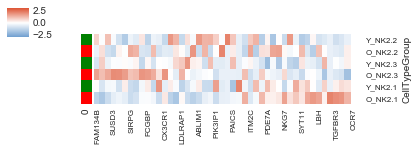

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

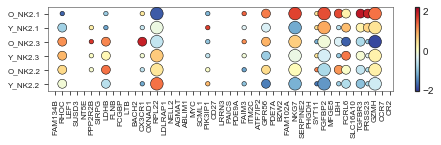

<Figure size 432x288 with 0 Axes>

In [465]:
Dir='../SourceData/'

name='NC2015_Top50_Age_associated_genes_Fig5e'
F=Dir+'{}.txt'.format(name)
DF=pd.read_csv(F,sep='\t',index_col=0)

F=Dir+'O7Y7_Metadata.txt'
Meta=pd.read_csv(F,sep='\t',index_col=0)
Metas=Meta[(Meta['CellType']=='NK2.1')|(Meta['CellType']=='NK2.2')|(Meta['CellType']=='NK2.3')]

GeneDF=ScanpyNormLns.copy()
GeneDF=GeneDF[list(Metas.index)]
#MarkerGenes=list(set(DF.index))
MarkerGenes=list(DF['AgeGene'])
#AgeGene
MarkerGenes = [i for i in MarkerGenes if i in list(GeneDF.index)]

GroupOrder=['Y_NK2.2','O_NK2.2','Y_NK2.3','O_NK2.3','Y_NK2.1','O_NK2.1']


MeanExpClustermap(name,GeneDF,MetaDF,name,'CellTypeGroup',hue='CellTypeGroup',MarkerGenes=MarkerGenes,RowCluster=False,ColCluster=False,hueColorDict=GroupDict,ClusterOrder=GroupOrder)       

    


    

# Fig7. 1a

samples infomarion

In [ ]:
# SourceData: IntegCOVID19_Metadata.txt


In [466]:
F='../SourceData/IntegCOVID19_Metadata.txt'
MetaDF=pd.read_csv(F,sep='\t',index_col=0)
print ('用于分析的全部细胞数:',len(MetaDF))

MetaDF.head()




用于分析的全部细胞数: 31882


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,Age,Disease,Group,Dataset,integrated_snn_res.0.4,seurat_clusters,...,labels,AgeNum,Sex,State,DiseaseDegree,DiseaseOnset,Patients,PBNK1_CellType2,Cluster,DiseaseAge
Y7_CTCCATGAGCAGCAGT-1,Y7,6044,1919,6.055592,Y,HC,HC_Y_1,Y7,0,0,...,NK_cell,NoInfo,NoInfo,control,control,control,Y7,Nkbright,5,HC_Y
O7_ATCTTCATCTGAGAAA-1,O7,4937,1838,8.912295,O,HC,HC_O_1,O7,1,1,...,NK_cell,NoInfo,NoInfo,control,control,control,O7,Nkbright,6,HC_O
O7_ACGTTCCCATTCCTCG-1,O7,5721,1810,6.257647,O,HC,HC_O_1,O7,5,5,...,NK_cell,NoInfo,NoInfo,control,control,control,O7,Nkbright,7,HC_O
Y7_TCTACCGTCGTGGCTG-1,Y7,3664,1252,6.250000,Y,HC,HC_Y_1,Y7,1,1,...,NK_cell,NoInfo,NoInfo,control,control,control,Y7,Nkbright,6,HC_Y
Y7_GTTAGACAGAGAACCC-1,Y7,5553,1860,7.545471,Y,HC,HC_Y_1,Y7,1,1,...,NK_cell,NoInfo,NoInfo,control,control,control,Y7,Nkbright,6,HC_Y


In [468]:
#PS: our scRNA-seq Y(Contains a combined sample of four people) + O(Contains a combined sample of four people)

NKperson_DF = MetaDF.drop_duplicates(subset='Patients', keep='first', inplace=False)
print ('All samples num：', len(NKperson_DF))


NKperson_COV_DF=NKperson_DF[NKperson_DF['Disease']=='COV']
NKperson_COV_O_DF=NKperson_COV_DF[NKperson_COV_DF['Age']=='O']
NKperson_COV_Y_DF=NKperson_COV_DF[NKperson_COV_DF['Age']=='Y']
print ('samples number from COVID19: ', len(NKperson_COV_DF))
print (' ','COV-Y: ',len(NKperson_COV_Y_DF))
print (' ','COV-O: ',len(NKperson_COV_O_DF))


NKperson_HC_DF=NKperson_DF[NKperson_DF['Disease']=='HC']
NKperson_HC_DF_O_DF=NKperson_HC_DF[NKperson_HC_DF['Age']=='O']
NKperson_HC_DF_Y_DF=NKperson_HC_DF[NKperson_HC_DF['Age']=='Y']
print ('samples number from HC: ：', len(NKperson_HC_DF))
print (' ','HC-Y: ',len(NKperson_HC_DF_Y_DF))
print (' ','HC-O: ',len(NKperson_HC_DF_O_DF))

NKperson_DF.head()

All samples num： 56
samples number from COVID19:  44
  COV-Y:  13
  COV-O:  31
samples number from HC: ： 12
  HC-Y:  9
  HC-O:  3


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,Age,Disease,Group,Dataset,integrated_snn_res.0.4,seurat_clusters,...,labels,AgeNum,Sex,State,DiseaseDegree,DiseaseOnset,Patients,PBNK1_CellType2,Cluster,DiseaseAge
Y7_CTCCATGAGCAGCAGT-1,Y7,6044,1919,6.055592,Y,HC,HC_Y_1,Y7,0,0,...,NK_cell,NoInfo,NoInfo,control,control,control,Y7,Nkbright,5,HC_Y
O7_ATCTTCATCTGAGAAA-1,O7,4937,1838,8.912295,O,HC,HC_O_1,O7,1,1,...,NK_cell,NoInfo,NoInfo,control,control,control,O7,Nkbright,6,HC_O
COV_O_d07_C156_GTGCTTCCAACTGGCC,d07,1723,869,3.598375,O,COV,COV_O,d07,2,2,...,NK_cell,67.0,M,severe onset,severe,onset,ZZ_S8,NonePBNK1,4,COV_O
COV_Y_d13_PGW3_TCGGTAAAGTAACCCT,d13,2333,1091,3.386198,Y,COV,COV_Y,d13,1,1,...,NK_cell,15.0,M,moderate convalescent,moderate,convalescent,SB_PGW3,NonePBNK1,6,COV_Y
COV_Y_d06_PM1_GGTGTTACAGTCGTGC,d06,2349,1152,2.852278,Y,COV,COV_Y,d06,1,1,...,NK_cell,15.0,M,moderate onset,moderate,onset,ZPH_PM1,NonePBNK1,6,COV_Y


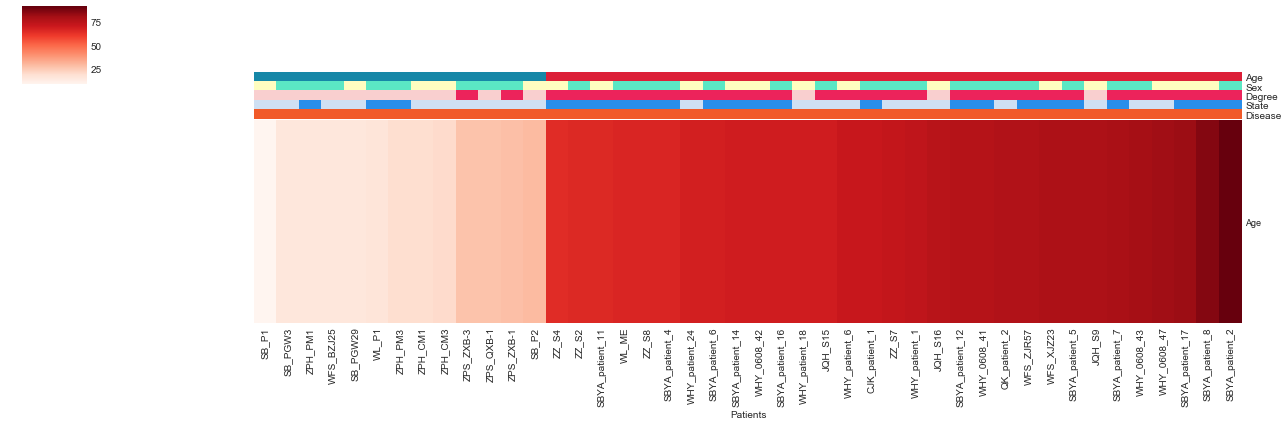

In [475]:
#Legend plot
DF=NKperson_COV_DF.copy()
name='PersonInfo_COV'

DF['年龄Group']=DF['Age']
DF['年龄']=DF['AgeNum']
DF['性别']=DF['Sex']
DF['发病程度']=DF['DiseaseDegree']
DF['发病状态']=DF['DiseaseOnset']
DF['数据集']=DF['Dataset']
DF['疾病']=DF['Disease']


DF=DF.set_index('Patients')
s=['年龄Group','年龄','性别','发病程度','发病状态','疾病','数据集']
DFs=DF[s]
DFs.head()
DFs=DFs.T

Samples=list(DFs)

AgeC=[]
SexC=[]
DegreeC=[]
StateC=[]
DiseaseC=[]

#年龄:
for s in Samples:
    if DFs[s]['年龄Group']=='O':
        AgeC.append('#dc1f38')
    elif DFs[s]['年龄Group']=='Y':
        AgeC.append('#1687a7')
    else:
        AgeC.append('white') 
               
#性别：
for s in Samples:
    if DFs[s]['性别']=='M':
        SexC.append('#5BE7C4')
    elif DFs[s]['性别']=='F':
        SexC.append('#FFFDC0')
    else:
        SexC.append('white') 


#发病程度
for s in Samples:
    if DFs[s]['发病程度']=='severe':
        DegreeC.append('#ec235b')
    elif DFs[s]['发病程度']=='moderate':
        DegreeC.append('#f9cfcf')
    else:
        DegreeC.append('white') 
        
#发病状态
for s in Samples:
    if DFs[s]['发病状态']=='onset':
        StateC.append('#298EEA')
    elif DFs[s]['发病状态']=='convalescent':
        StateC.append('#CFE0F3')
    else:
        StateC.append('white') 
        
#疾病与否：
for s in Samples:
    if DFs[s]['疾病']=='HC':
        DiseaseC.append('#00a651')
    elif DFs[s]['疾病']=='COV':
        DiseaseC.append('#f15a29')
    else:
        DiseaseC.append('white') 

ColorDF_COV=pd.DataFrame({'Age':AgeC,'Sex':SexC,'Degree':DegreeC,'State':StateC,'Disease':DiseaseC} ,index=Samples)


AgeDF_COV=DFs.loc['年龄'].to_frame(name='Age').sort_values(by='Age')
AgeDF_COV['Age']=AgeDF_COV['Age'].map(float)
AgeDF_COV=AgeDF_COV.sort_values(by='Age')
AgeDF_COV=AgeDF_COV.T


AgeDF_COV = AgeDF_COV.astype(float)
fig=sns.clustermap(AgeDF_COV,figsize=(18,6),linecolor='black',col_colors=ColorDF_COV,linewidth=0.0,col_cluster=False,row_cluster=False,cmap='Reds')                    
plt.setp(fig.ax_heatmap.get_yticklabels(), rotation=0, fontsize=9)
plt.setp(fig.ax_heatmap.get_xticklabels(), rotation=90, fontsize=10)
fig.savefig('../Figures/SamplesInfo_Fig7a.pdf')
plt.show()  

# Fig. 7b,c

In [484]:
# SourceData: IntegCOVID19_Metadata.txt


In [480]:
outDir='../Figures/'
def Scatter_Group(ScatterDF=None,X='UMAP1',Y='UMAP2',hue=None,sub=None,outDir=outDir,hueColorDict=None,legend=True,Size=None):
    if legend:
        outfig=outDir+sub+'_by_'+hue+'_Legend.png'
    else:
        outfig=outDir+sub+'_by_'+hue+'.png'
    plt.style.use('seaborn-white')
    fig=plt.figure(figsize=(4,4))
    ax=fig.add_axes([0.15,0.15,0.8,0.8])
    if type(hueColorDict)==str:
        sns.scatterplot(x=X,y=Y,data=ScatterDF,hue=hue,palette=customPalette,s=Size,ax=ax,alpha=0.6,edgecolor=None)
        ax.legend(fontsize='xx-small',markerscale=8,ncol=3,edgecolor='k',columnspacing=0.1,labelspacing=0.2,handletextpad=0.5,loc=3)
    elif type(hueColorDict)==dict:
        for h in hueColorDict:
            c=hueColorDict[h]
            DFsub=ScatterDF[ScatterDF[hue]==h]
            ax.scatter(DFsub[X],DFsub[Y],c=c,s=Size,label=h,edgecolor='none')
        if legend:
            ax.legend(fontsize='xx-small',markerscale=5,ncol=3,edgecolor='k',columnspacing=0.3,labelspacing=0.3,handletextpad=0.5,loc=3)
    #ax.set_title(hue,fontsize=20)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.set_xlim([-7.5,7])
    ax.set_ylim([-7,6.8])
    fig.savefig(outfig,dpi=500)
    plt.show()

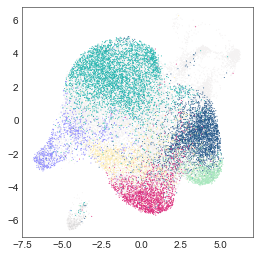

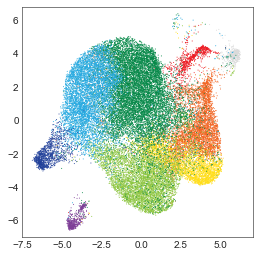

In [483]:
#cell colour by Group
PBNK1ColorsDict={'NonePBNK1':'#f4f2f2','Nkbright':'#8B88FF','NKpro':'#dbdada','AdapativeNK_1':'#235789','AdapativeNK_2':'#dd2a7b','AdapativeNK_3':'#ffeead','AdapativeNK_4':'#A7E8BD','MatureNK':'#23B5AF'}
Scatter_Group(MetaDF,hue='PBNK1_CellType2',sub='O7Y7',hueColorDict=PBNK1ColorsDict,legend=False,Size=1.0)
ClusterColorsDict={9:'#dadada', 6:'#ED1C24', 3:'#F26522', 4:'#FFDE17', 
                   2:'#8DC63F', 0:'#068949', 1:'#27AAE1', 5:'#21409A', 7:'#7F3F98'}
Scatter_Group(MetaDF,hue='seurat_clusters',sub='Clusters',hueColorDict=ClusterColorsDict,legend=False,Size=1.0)


# Fig. 7d,e

In [485]:
# SourceData: IntegCOVID19_Metadata.txt


# Cell number:

In [486]:
#step1: 细胞比例：
outDir='../SourceData/'


#对于每一个name(PBNK1)，循环从c0到c7的细胞数(百分比的)，写入txt，一行
#写列名(dataset，只需要写一次)
with open(outDir+'/CellPor_RawCluster_ColClusterCellNum_Fig7d.txt','a+')as f:
    for i in sorted(list(set(MetaDF['Cluster']))):
        f.write('%s\t'%i)
with open(outDir+'/CellPor_RawCluster_ColClusterCellNum_Fig7d.txt','a+')as f:
        f.write('\n')

with open(outDir+'/CellPor_RawCluster_ColClusterCellNum_Fig7d.txt','a+')as f:
        f.write('num\t')
for name in sorted(list(set(MetaDF['Cluster']))):


    
    num=len(MetaDF[MetaDF['Cluster']==name])/float(len(MetaDF))
    with open(outDir+'/CellPor_RawCluster_ColClusterCellNum_Fig7d.txt','a+')as f:
        f.write('%s\t'%num)

            

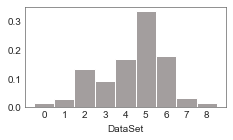

In [488]:
#step2: Plot Barplot
#统计用到的样本Mapping Reads:
BF=outDir+'/CellPor_RawCluster_ColClusterCellNum_Fig7d.txt'
B=pd.read_csv(BF,sep='\t',index_col=0)
B=B.dropna(axis=1,how='all') 
B=B.T

sort=['0','1','2','3','4','5','6','7','8']
B=B.loc[sort]

#B['UnMappingRate%']=100.0-B['OverallAlignmentRate%']
#B['Map2']=B['FinalMappedReads']*2
#bar values: Unmap + Mito + dupli + Map
bars0 = list(B['num'])


# The position of the bars on the x-axis
r= range(len(B)) 
# Names of group and bar width
names = list(B.index)
barWidth = 1

# Create brown bars
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(4,2))
ax=fig.add_axes([0.2,0.2,0.7,0.7])

# Create green bars (middle), on top of the firs ones
#TissueColorsDict={'PB':'#cccccc','SP':'#8a8acb','LV':'#56b881','BM':'#90cef1','UT':'#f7d66d','KD':'#e55e5e'}
#plt.bar(r, bars0, color='#dedcee', edgecolor='white', width=barWidth)
#plt.bar(r, bars1, bottom=bars0, color='#6a60a9', edgecolor='white', width=barWidth)
#plt.bar(r, bars2, bottom=bars_0_1, color='#fffcf0', edgecolor='white', width=barWidth)
#plt.bar(r, bars3, bottom=bars_0_1_2, color='#fbd14b', edgecolor='white', width=barWidth)
#control
plt.bar(r, bars0, color='#a39e9e', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='regular')
plt.xlabel("DataSet")
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
fig.savefig('../Figures/CellPor_RawCluster_ColClusterCellNum_Fig7d.pdf')
# Show graphic
plt.show()



# Age Group

In [489]:
#step1: 细胞比例：
outDir='../SourceData/'


#对于每一个name(PBNK1)，循环从c0到c7的细胞数(百分比的)，写入txt，一行
#写列名(dataset，只需要写一次)
with open(outDir+'/CellPor_RawCluster_ColAge_Fig7e.txt','a+')as f:
    for i in sorted(list(set(MetaDF['Age']))):
        f.write('%s\t'%i)
with open(outDir+'/CellPor_RawCluster_ColAge_Fig7e.txt','a+')as f:
        f.write('\n')


for name in sorted(list(set(MetaDF['Cluster']))):
    
    DFnum=MetaDF[MetaDF['Cluster']==name]

    #写行名(dataset)
    with open(outDir+'/CellPor_RawCluster_ColAge_Fig7e.txt','a+')as f:
        f.write('%s\t'%name)
    
    #写matrix（按dataset写入细胞比例）
    for i in sorted(list(set(MetaDF['Age']))):
        num=len(DFnum[DFnum['Age']==i])/float(len(DFnum))
        with open(outDir+'/CellPor_RawCluster_ColAge_Fig7e.txt','a+')as f:
            f.write('%s\t'%num)
        
    with open(outDir+'/CellPor_RawCluster_ColAge_Fig7e.txt','a+')as f:
            f.write('\n')

            

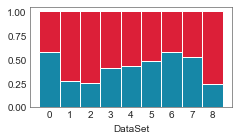

In [491]:
#step2: Plot Barplot
#统计用到的样本Mapping Reads:
BF=outDir+'/CellPor_RawCluster_ColAge_Fig7e.txt'
B=pd.read_csv(BF,sep='\t',index_col=0)
B=B.dropna(axis=1,how='all') 

sort=[0,1,2,3,4,5,6,7,8]
B=B.loc[sort]

#B['UnMappingRate%']=100.0-B['OverallAlignmentRate%']
#B['Map2']=B['FinalMappedReads']*2
#bar values: Unmap + Mito + dupli + Map
bars0 = list(B['Y'])
bars1 = list(B['O'])



#累加bar
# Heights of bars1 + bars2
bars_0_1 = np.add(bars0, bars1).tolist()


# The position of the bars on the x-axis
r= range(len(B)) 
# Names of group and bar width
names = list(B.index)
barWidth = 1

# Create brown bars
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(4,2))
ax=fig.add_axes([0.2,0.2,0.7,0.7])
plt.bar(r, bars0, color='#1687a7', edgecolor='white', width=barWidth)
plt.bar(r, bars1, bottom=bars0, color='#dc1f38', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='regular')
plt.xlabel("DataSet")
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
fig.savefig('../Figures/CellPor_RawCluster_ColAge_Fig7e.pdf')
plt.show()



# Fig. 7f

DEG See"FindMarkers_For_DEG.R"

DEG See"Normalization_for_scRNA.py"

In [494]:
# SourceData: IntegCOVID19_Metadata.txt
# SourceData: IntegNk_ScanpyNorm_Ln.txt
# SourceData: DEG_numver_COVvsHC_inDiffGroup_Fig7f.txt

# Fig. 7g

GOterm :Supplementary Table 8_Fig7g_C2_Elder(COV19vsHC)_GOterm.xlsx

# Fig. 7h,i

'IntegCOVID19_ScanpyNorm_Ln_R-HSA-909733.txt' was obtained using 'Normalization_for_scRNA.py'

In [502]:
F='../SourceData/IntegCOVID19_Metadata.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)
DFs=DF[DF['Cluster']==2]
DFs

ScanpyNormLnF='../SourceData/IntegCOVID19_ScanpyNorm_Ln_R-HSA-909733.txt'
ScanpyNormLn=pd.read_table(ScanpyNormLnF,sep='\t',index_col=0)
ScanpyNormLns=ScanpyNormLn[list(DFs.index)]

F='../SourceData/R-HSA-909733_Fig7hi.txt'
GeneDF=pd.read_csv(F,sep='\t',index_col=0)
Gene=list(GeneDF['R-HSA-909733'])
Genes=list(set(Gene).intersection(set(list(ScanpyNormLns.index))))

Expz=ScanpyNormLns.loc[Genes].dropna(how='all').T
#Cauculate Geneset score(Normalized score)

#Zscore by Gene(each gene across cellsa)
Expz=ScanpyNormLns.loc[Genes].dropna(how='all').T.apply(scipy.stats.zscore,axis=0)
#Cauculate Geneset score(Normalized score)
#Step1:each gene,Zscore by Gene(each gene across cells)
Expz=ScanpyNormLns.loc[Genes].dropna(how='all').T.apply(scipy.stats.zscore,axis=0)
Expz=Expz.dropna(axis=1, how='any')
Expz=Expz.loc[list(DFs.index)]
Feature=list(Expz.apply(sum,axis=1))

#Step2:each cell,sum expression of gene in the geneset and then, normalzied to (0,1)
Feature=list(Expz.apply(sum,axis=1))
Min=min(Feature)
Range=max(Feature)-Min
FeatureScore=[(i-Min)/(Range+0.0000001) for i in Feature ]
DFs['R-HSA-909733']=FeatureScore
DFs.to_csv('../SourceData/R-HSA-909733_Fig7hi_inCOV19_C2_Fig7hi.txt',sep='\t')
DFs.head()



/Users/huangbeibei/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,Age,Disease,Group,Dataset,integrated_snn_res.0.4,seurat_clusters,...,AgeNum,Sex,State,DiseaseDegree,DiseaseOnset,Patients,PBNK1_CellType2,Cluster,DiseaseAge,R-HSA-909733
Y7_GCATCTCAGCCAAGTG-1,Y7,5275,2010,5.383886,Y,HC,HC_Y_1,Y7,3,3,...,NoInfo,NoInfo,control,control,control,Y7,Nkbright,2,HC_Y,0.282463
Y7_TTAGGCAAGGGAGAAT-1,Y7,4643,1688,5.879819,Y,HC,HC_Y_1,Y7,3,3,...,NoInfo,NoInfo,control,control,control,Y7,AdapativeNK_1,2,HC_Y,0.243542
O7_CACTGGGTCGGCATCG-1,O7,4368,1666,4.990842,O,HC,HC_O_1,O7,3,3,...,NoInfo,NoInfo,control,control,control,O7,AdapativeNK_1,2,HC_O,0.210132
O7_GATTCGAAGCACACCC-1,O7,4826,1593,4.082056,O,HC,HC_O_1,O7,3,3,...,NoInfo,NoInfo,control,control,control,O7,AdapativeNK_1,2,HC_O,0.219460
O7_GATGCTAGTAACAGTA-1,O7,4759,1732,6.261820,O,HC,HC_O_1,O7,3,3,...,NoInfo,NoInfo,control,control,control,O7,AdapativeNK_1,2,HC_O,0.305358


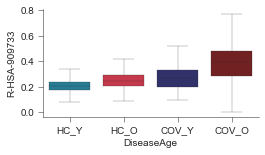

In [529]:
#GenePlotDF.to_csv('NK123_inCellType2Group.txt',sep='\t')
F='../SourceData/R-HSA-909733_Fig7hi_inCOV19_C2_Fig7hi.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

#DF=DF[(DF['CellType2']=='AdapativeNK_1')|(DF['CellType2']=='AdapativeNK_2')|(DF['CellType2']=='AdapativeNK_3')]
#DF.to_csv('AgeGene_NK123_GeneSetScore_norm01.txt',sep='\t')
plt.style.use('seaborn-white')
fig1=plt.figure(figsize=(4,2))
ax1=fig1.add_axes([0.2,0.2,0.75,0.75])
ColorList=['#1687A7', '#DC223B','#282973', '#7F1416']
sns.boxplot(x='DiseaseAge',y='R-HSA-909733',data=DF,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,showfliers=False,order=['HC_Y','HC_O','COV_Y','COV_O'])
#sns.violinplot(x='Order',y='AgeGene.SeuratVar',data=DF,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,inner="box",saturation=1.0,scale="width")
ax1.tick_params(axis='x',length=5,width=0.5,labelsize=10,direction='out')
ax1.tick_params(axis='y',length=5,width=0.5,labelsize=10,direction='out')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.0)
ax1.spines['top'].set_linewidth(0.0)
#ax1.set_ylim([0.15,0.5])
fig1.savefig('../Figures/R-HSA-909733_Fig7hi_inCOV19_C2_Fig7h.pdf')
plt.show()



#P-value using ranksums

In [520]:
#P-value using ranksums

for i in list(set(DF['DiseaseAge'])):
    for j in list(set(DF['DiseaseAge'])):
        Cell1=list(DF[(DF['DiseaseAge']=='{}'.format(i)) ].index)
        Cell2=list(DF[(DF['DiseaseAge']=='{}'.format(j)) ].index)
        O=DF.loc[Cell1]
        Oscore=list(O['R-HSA-909733'])
        Y=DF.loc[Cell2]
        Yscore=list(Y['R-HSA-909733'])
        pval=scipy.stats.ranksums(Oscore,Yscore)[1]
        print (i, j, 'P-value: ',pval)


Cell1=list(DF[(DF['Disease']=='HC') ].index)
Cell2=list(DF[(DF['Disease']=='COV')].index)
O=DF.loc[Cell1]
Oscore=list(O['R-HSA-909733'])
Yscore=list(Y['R-HSA-909733'])
pval=scipy.stats.ranksums(Oscore,Yscore)[1]
print ('P-value （COV vs HC）: ',pval)
    
    

COV_Y COV_Y P-value:  1.0
COV_Y COV_O P-value:  1.111082835751779e-36
COV_Y HC_O P-value:  0.00456739113747255
COV_Y HC_Y P-value:  2.1344286976427736e-23
COV_O COV_Y P-value:  1.111082835751779e-36
COV_O COV_O P-value:  1.0
COV_O HC_O P-value:  6.264211953870376e-150
COV_O HC_Y P-value:  1.6182025733533505e-146
HC_O COV_Y P-value:  0.00456739113747255
HC_O COV_O P-value:  6.264211953870376e-150
HC_O HC_O P-value:  1.0
HC_O HC_Y P-value:  9.25641223919402e-59
HC_Y COV_Y P-value:  2.1344286976427736e-23
HC_Y COV_O P-value:  1.6182025733533505e-146
HC_Y HC_O P-value:  9.25641223919402e-59
HC_Y HC_Y P-value:  1.0
P-value （COV vs HC）:  8.20812900779158e-35


In [ ]:
#HC_O HC_Y P-value:  9.25641223919402e-59
#COV_Y COV_O P-value:  1.111082835751779e-36
#HC_Y COV_Y P-value:  2.1344286976427736e-23
#HC_O COV_O P-value:  6.264211953870376e-150

#P-value （COV vs HC）:  8.20812900779158e-35

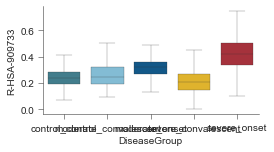

In [659]:
#GenePlotDF.to_csv('NK123_inCellType2Group.txt',sep='\t')
F='../SourceData/R-HSA-909733_Fig7hi_inCOV19_C2_Fig7hi.txt'
DF=pd.read_csv(F,sep='\t',index_col=0)

DF['DiseaseGroup']=DF['DiseaseDegree']+'_'+DF['DiseaseOnset']

plt.style.use('seaborn-white')
fig1=plt.figure(figsize=(4,2))
ax1=fig1.add_axes([0.2,0.2,0.75,0.75])
ColorList=['#368498', '#76C2E1','#005C9B', '#FDC20F','#B81F2C']
sns.boxplot(x='DiseaseGroup',y='R-HSA-909733',data=DF,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,showfliers=False,order=['control_control','moderate_convalescent','moderate_onset','severe_convalescent','severe_onset'])
#sns.violinplot(x='Order',y='AgeGene.SeuratVar',data=DF,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,inner="box",saturation=1.0,scale="width")
ax1.tick_params(axis='x',length=5,width=0.5,labelsize=10,direction='out')
ax1.tick_params(axis='y',length=5,width=0.5,labelsize=10,direction='out')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.0)
ax1.spines['top'].set_linewidth(0.0)
#ax1.set_ylim([0.15,0.5])
fig1.savefig('../Figures/R-HSA-909733_Fig7hi_inCOV19_C2_Fig7i.pdf')
plt.show()



In [660]:
#计算P
def Pcalculate(i,j):
    Cell1=list(DF[(DF['DiseaseGroup']=='{}'.format(i)) ].index)
    Cell2=list(DF[(DF['DiseaseGroup']=='{}'.format(j)) ].index)
    O=DF.loc[Cell1]
    Oscore=list(O['R-HSA-909733'])
    Y=DF.loc[Cell2]
    Yscore=list(Y['R-HSA-909733'])
    pval=scipy.stats.ranksums(Oscore,Yscore)[1]
    print (i, j, 'P-value: ',pval)

    
Pcalculate('control_control','moderate_convalescent')
Pcalculate('control_control','moderate_onset')
Pcalculate('control_control','severe_convalescent')
Pcalculate('control_control','severe_onset')

Pcalculate('severe_onset','severe_convalescent')
Pcalculate('severe_onset','moderate_onset')
Pcalculate('severe_onset','moderate_convalescent')
Pcalculate('severe_onset','control_control')

control_control moderate_convalescent P-value:  0.015387789633041242
control_control moderate_onset P-value:  7.588095977253437e-13
control_control severe_convalescent P-value:  2.576693158655429e-05
control_control severe_onset P-value:  4.970745905259147e-243
severe_onset severe_convalescent P-value:  3.681327960256381e-49
severe_onset moderate_onset P-value:  7.853206656029716e-09
severe_onset moderate_convalescent P-value:  1.3984009648103687e-54
severe_onset control_control P-value:  4.970745905259147e-243


In [536]:
#计算P
def Pcalculate(i,j):
    Cell1=list(DF[(DF['DiseaseDegree']=='{}'.format(i)) ].index)
    Cell2=list(DF[(DF['DiseaseDegree']=='{}'.format(j)) ].index)
    O=DF.loc[Cell1]
    Oscore=list(O['R-HSA-909733'])
    Y=DF.loc[Cell2]
    Yscore=list(Y['R-HSA-909733'])
    pval=scipy.stats.ranksums(Oscore,Yscore)[1]
    print (i, j, 'P-value: ',pval)

Pcalculate('moderate','severe')

moderate severe P-value:  5.90597899437315e-36
